In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import ast
import re

# Load the dataset

In [ ]:
# IMPORT THE DATA.CSV FILE INTO THIS DIRECTORY /content/drive/MyDrive/

## READING THE DATASET LINE BY LINE
# Initialize an empty list to store the rows
data = []

with open("/content/drive/MyDrive/data.csv", 'r', newline='', encoding='utf-8') as file:
   reader = csv.reader(file)
   header = next(reader)
   # Process the remaining lines as data
   for row in reader:
    # Assuming the last column is the array and may contain commas
    if len(row) > len(header):
      # Join the excess elements back into the last column
      last_column = ','.join(row[len(header) - 1:])
      row = row[:len(header) - 1] + [last_column]
      # Append the row to the data list
      data.append(row)

# Convert the list of rows into a DataFrame using the header as column names
df = pd.DataFrame(data,columns=header)


In [ ]:
df.head()

id       screenName                   tags  \
0          1969527638  LlngoMakeEmCum_  [ "#nationaldogday" ]   
1            51878493     _notmichelle  [ "#nationaldogday" ]   
2          1393409100        jesseayye          [ "#narcos" ]   
3           232891415     MrBrianLloyd     [ "#gloryoutnow" ]   
4  710130422907207680    sarahdorat_16  [ "#nationaldogday" ]   

                                              avatar followersCount  \
0  http://pbs.twimg.com/profile_images/5342862178...            319   
1  http://pbs.twimg.com/profile_images/7619776021...            275   
2  http://pbs.twimg.com/profile_images/7132829382...            120   
3  http://pbs.twimg.com/profile_images/1334406683...            492   
4  http://pbs.twimg.com/profile_images/7671805202...            128   

  friendsCount lang       lastSeen             tweetId  \
0          112   en  1472271687519  769310701580083200   
1          115   en  1472270622663  769309490038439936   
2          107   en  1472804144409  771622623583186944   
3          325   en  1472269186776  769308131696467969   
4          218   en  1472271397356  769309769144283137   

                                             friends  
0  [ "1969574754", "1969295556", "1969284056", "1...  
1  [ "60789485", "2420931980", "2899776756", "127...  
2  [ "86868062", "19697415", "2998836604", "45629...  
3  [ "361335082", "1405248468", "24626354", "7256...  
4  [ "1571896093", "768938323612008448", "2548665...

# Understanding the Dataset

In [ ]:
df.describe()

id       screenName                   tags  \
count        39914            39914                  39914   
unique       39914            39914                    160   
top     1969527638  LlngoMakeEmCum_  [ "#nationaldogday" ]   
freq             1                1                  30096   

                          avatar followersCount friendsCount   lang lastSeen  \
count                      39914          39914        39914  39914    39914   
unique                     39213           5991         3944    585    39228   
top      "#respecttylerjoseph" ]            140          200     en       en   
freq                         105             93           95  39172      683   

       tweetId                                            friends  
count    39914                                              39914  
unique   39856                                              39914  
top         en  [ "1969574754", "1969295556", "1969284056", "1...  
freq        59                                                  1

In [ ]:
df.shape

(39914, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39914 entries, 0 to 39913
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              39914 non-null  object
 1   screenName      39914 non-null  object
 2   tags            39914 non-null  object
 3   avatar          39914 non-null  object
 4   followersCount  39914 non-null  object
 5   friendsCount    39914 non-null  object
 6   lang            39914 non-null  object
 7   lastSeen        39914 non-null  object
 8   tweetId         39914 non-null  object
 9   friends         39914 non-null  object
dtypes: object(10)
memory usage: 3.0+ MB


In [ ]:
df.columns

Index(['id', 'screenName', 'tags', 'avatar', 'followersCount', 'friendsCount',
       'lang', 'lastSeen', 'tweetId', 'friends'],
      dtype='object')

In [ ]:
df_new = df.drop(columns=['screenName','tags','avatar','friends'])
df_new

id                                     followersCount  \
0              1969527638                                                319   
1                51878493                                                275   
2              1393409100                                                120   
3               232891415                                                492   
4      710130422907207680                                                128   
...                   ...                                                ...   
39909          2392502478  http://pbs.twimg.com/profile_images/7693955427...   
39910          1014398065                                                119   
39911           177430436                                               2023   
39912            20240488                                               2881   
39913           946109466                                               1679   

      friendsCount   lang       lastSeen             tweetId  
0              112     en  1472271687519  769310701580083200  
1              115     en  1472270622663  769309490038439936  
2              107     en  1472804144409  771622623583186944  
3              325     en  1472269186776  769308131696467969  
4              218     en  1472271397356  769309769144283137  
...            ...    ...            ...                 ...  
39909        13645  13624             en       1472289186728  
39910          113     en  1472288980846  769461852791312384  
39911         1882     en  1472288982066  769461872198356992  
39912         1526     en  1472288984948  769461874953969664  
39913         1592     en  1472289145743  769461878410059777  

[39914 rows x 6 columns]

# Data Preprocessing / Data Cleaning

### Checking for Null values

In [ ]:
df_new.isna().sum()

id                0
followersCount    0
friendsCount      0
lang              0
lastSeen          0
tweetId           0
dtype: int64

### Checking for Duplicated value

In [ ]:
df_new.duplicated().sum()

0

### Checking for invalid data

In [ ]:
# Function to validate each row
def validate_row(row):
    errors = []

    # Check column 1: Max 19 digits
    if not (re.fullmatch(r'\d{1,19}', row['id'])):
        errors.append('id')

    # Check column 2: Digits only
    if not (re.fullmatch(r'\d+', row['followersCount'])):
        errors.append('followersCount')

    # Check column 3: Digits only
    if not (re.fullmatch(r'\d+', row['friendsCount'])):
        errors.append('friendsCount')

    # Check column 4: Alphabet only
    if not (re.fullmatch(r'[A-Za-z]+', row['lang'])):
        errors.append('lang')

    # Check column 5: Must be exactly 13 digits
    if not (re.fullmatch(r'\d{13}', row['lastSeen'])):
        errors.append('lastSeen')

    # Check column 6: Must be exactly 18 digits
    if not (re.fullmatch(r'\d{18}', row['tweetId'])):
        errors.append('tweetId')

    return errors

# Apply the validation function to each row
df_new['errors'] = df.apply(validate_row, axis=1)

In [ ]:
# Filter rows with any errors
invalid = df_new[df_new['errors'].apply(lambda x: len(x) > 0)].copy()

# Add the original index to keep track of the position
invalid['original_position'] = invalid.index

# Display the DataFrame with invalid rows and their positions
invalid_df = invalid[['id','original_position', 'errors']].reset_index(drop=True)
invalid_df

id  original_position  \
0            1571949344                 45   
1            2160886219                 84   
2             796932380                179   
3             505781191                204   
4    713232063747362816                214   
..                  ...                ...   
737           388883240              39848   
738            42538918              39882   
739           350966142              39896   
740            56643102              39901   
741          2392502478              39909   

                                                errors  
0            [followersCount, lang, lastSeen, tweetId]  
1            [followersCount, lang, lastSeen, tweetId]  
2            [followersCount, lang, lastSeen, tweetId]  
3            [followersCount, lang, lastSeen, tweetId]  
4            [followersCount, lang, lastSeen, tweetId]  
..                                                 ...  
737          [followersCount, lang, lastSeen, tweetId]  
738  [followersCount, friendsCount, lang, lastSeen,...  
739          [followersCount, lang, lastSeen, tweetId]  
740          [followersCount, lang, lastSeen, tweetId]  
741          [followersCount, lang, lastSeen, tweetId]  

[742 rows x 3 columns]

In [ ]:
df_new.loc[45]

id                                                       1571949344
followersCount    http://pbs.twimg.com/profile_images/7695636245...
friendsCount                                                    170
lang                                                            284
lastSeen                                                         en
tweetId                                               1472385524339
errors                    [followersCount, lang, lastSeen, tweetId]
Name: 45, dtype: object

### Removing invalid row

In [ ]:
# Remove rows with non-numeric followersCount
df = df[df['followersCount'].apply(lambda x: str(x).isdigit())]

# Convert followersCount to integer
df['followersCount'] = df['followersCount'].astype(int)

# Remove rows with non-numeric friendsCount
df = df[df['friendsCount'].apply(lambda x: str(x).isdigit())]

# Convert friendsCount to integer
df['friendsCount'] = df['friendsCount'].astype(int)

# Remove rows with non-alphabetic lang
df = df[df['lang'].apply(lambda x: str(x).isalpha())]


<ipython-input-19-4fc4559e7b4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['followersCount'] = df['followersCount'].astype(int)


In [ ]:
df.shape

(39172, 10)

In [ ]:
df = df.reset_index(drop=True)
df

id       screenName                       tags  \
0              1969527638  LlngoMakeEmCum_      [ "#nationaldogday" ]   
1                51878493     _notmichelle      [ "#nationaldogday" ]   
2              1393409100        jesseayye              [ "#narcos" ]   
3               232891415     MrBrianLloyd         [ "#gloryoutnow" ]   
4      710130422907207680    sarahdorat_16      [ "#nationaldogday" ]   
...                   ...              ...                        ...   
39167           342715775         adamftsh      [ "#nationaldogday" ]   
39168          1014398065  Yeh_its_Choolwe           [ "#belgiangp" ]   
39169           177430436      cachelebell      [ "#nationaldogday" ]   
39170            20240488  LifestyleMGroup             [ "#weekend" ]   
39171           946109466     jessmorris98  [ "#respecttylerjoseph" ]   

                                                  avatar  followersCount  \
0      http://pbs.twimg.com/profile_images/5342862178...             319   
1      http://pbs.twimg.com/profile_images/7619776021...             275   
2      http://pbs.twimg.com/profile_images/7132829382...             120   
3      http://pbs.twimg.com/profile_images/1334406683...             492   
4      http://pbs.twimg.com/profile_images/7671805202...             128   
...                                                  ...             ...   
39167  http://pbs.twimg.com/profile_images/7634619259...            1268   
39168  http://pbs.twimg.com/profile_images/7686792851...             119   
39169  http://pbs.twimg.com/profile_images/7682146938...            2023   
39170  http://pbs.twimg.com/profile_images/7398527185...            2881   
39171  http://pbs.twimg.com/profile_images/7649695849...            1679   

       friendsCount lang       lastSeen             tweetId  \
0               112   en  1472271687519  769310701580083200   
1               115   en  1472270622663  769309490038439936   
2               107   en  1472804144409  771622623583186944   
3               325   en  1472269186776  769308131696467969   
4               218   en  1472271397356  769309769144283137   
...             ...  ...            ...                 ...   
39167           766   en  1472288980491  769461849909637124   
39168           113   en  1472288980846  769461852791312384   
39169          1882   en  1472288982066  769461872198356992   
39170          1526   en  1472288984948  769461874953969664   
39171          1592   en  1472289145743  769461878410059777   

                                                 friends  
0      [ "1969574754", "1969295556", "1969284056", "1...  
1      [ "60789485", "2420931980", "2899776756", "127...  
2      [ "86868062", "19697415", "2998836604", "45629...  
3      [ "361335082", "1405248468", "24626354", "7256...  
4      [ "1571896093", "768938323612008448", "2548665...  
...                                                  ...  
39167  [ "1115874631", "756538678227329026", "7519872...  
39168  [ "29359583", "24515927", "345358431", "739864...  
39169  [ "323073788", "4855395791", "803659230", "234...  
39170  [ "86101271", "7111412", "8830542", "349236669...  
39171  [ "759526036992208897", "726502847009923072", ...  

[39172 rows x 10 columns]

### Extract Array Column in numpy

In [ ]:
# Separate the 'array_column' into individual columns using pd.Series
friends = df['friends'].apply(pd.Series)

# Convert to a NumPy array
friends_c = friends.to_numpy()

In [ ]:
#array column in dataframe
friends

0
0      [ "1969574754", "1969295556", "1969284056", "1...
1      [ "60789485", "2420931980", "2899776756", "127...
2      [ "86868062", "19697415", "2998836604", "45629...
3      [ "361335082", "1405248468", "24626354", "7256...
4      [ "1571896093", "768938323612008448", "2548665...
...                                                  ...
39167  [ "1115874631", "756538678227329026", "7519872...
39168  [ "29359583", "24515927", "345358431", "739864...
39169  [ "323073788", "4855395791", "803659230", "234...
39170  [ "86101271", "7111412", "8830542", "349236669...
39171  [ "759526036992208897", "726502847009923072", ...

[39172 rows x 1 columns]

In [ ]:
 #array column in numpy
friends_c

array([['[ "1969574754", "1969295556", "1969284056", "1969612214", "1970067476", "1969797386", "1969430539", "1969840064", "1969698176", "1970005154", "283011644", "1969901029", "1969563175", "1969302314", "1969978662", "1969457936", "1969667533", "1969547821", "1969943478", "1969668032", "283006529", "1969809440", "1969601096", "1969298856", "1969331652", "1969385498", "1969674368", "1969565263", "1970144676", "1969745390", "1969947438", "1969734134", "1969801326", "1969324008", "1969259820", "1969535827", "1970072989", "1969771688", "1969437804", "1969507394", "1969509972", "1969751588", "283012808", "1969302888", "1970224440", "1969603532", "283011244", "1969501046", "1969887518", "1970153138", "1970267527", "1969941955", "1969421654", "1970013110", "1969544905", "1969839590", "1969876500", "1969674625", "1969337952", "1970046536", "1970090934", "1969419133", "1969517215", "1969787869", "1969298065", "1970149771", "1969422638", "1969504268", "1970025554", "1969776001", "1970138611",

### Remove invalid id from numpy array

In [ ]:
#Define the specific column to compare with (e.g., col1)
column_to_compare = invalid_df['id']

#Function to remove matching numbers
def remove_matching_numbers(numpy_array, column_to_compare):
    updated_array = []
    for arr in numpy_array:
        filtered_arr = [num for num in arr if num not in column_to_compare.values]
        updated_array.append(filtered_arr)
    return np.array(updated_array, dtype=object)

In [ ]:
friends_col = remove_matching_numbers(friends_c, column_to_compare)
friends_col

array([['[ "1969574754", "1969295556", "1969284056", "1969612214", "1970067476", "1969797386", "1969430539", "1969840064", "1969698176", "1970005154", "283011644", "1969901029", "1969563175", "1969302314", "1969978662", "1969457936", "1969667533", "1969547821", "1969943478", "1969668032", "283006529", "1969809440", "1969601096", "1969298856", "1969331652", "1969385498", "1969674368", "1969565263", "1970144676", "1969745390", "1969947438", "1969734134", "1969801326", "1969324008", "1969259820", "1969535827", "1970072989", "1969771688", "1969437804", "1969507394", "1969509972", "1969751588", "283012808", "1969302888", "1970224440", "1969603532", "283011244", "1969501046", "1969887518", "1970153138", "1970267527", "1969941955", "1969421654", "1970013110", "1969544905", "1969839590", "1969876500", "1969674625", "1969337952", "1970046536", "1970090934", "1969419133", "1969517215", "1969787869", "1969298065", "1970149771", "1969422638", "1969504268", "1970025554", "1969776001", "1970138611",

### Checking to confirm removed id

In [ ]:
# Function to find the indices (row positions) where the value is located
def find_string_indices(df, column, search_value):
    # List to store the indices where the search_value is found
    indices = []

    # Iterate over the DataFrame
    for index, row in df.iterrows():
        # Ensure the row[column] is a list before searching
        if isinstance(row[column], list) and search_value in row[column]:
            indices.append(index)  # Add the row index if found

    return indices

In [ ]:
# The specific number you want to search for
search_id = "1969295556"

# Use a boolean mask to find where the number is located
result = np.isin(friends_col, search_id)

# Get the indices of the number in the array
indices = np.argwhere(result)

# Display the result
print(f"Number {search_id} found at indices: {indices}")

Number 1969295556 found at indices: []


### Dropping Columns

In [ ]:
df = df.drop(columns=['avatar','lastSeen','tweetId','lang'])
df

id       screenName                       tags  \
0              1969527638  LlngoMakeEmCum_      [ "#nationaldogday" ]   
1                51878493     _notmichelle      [ "#nationaldogday" ]   
2              1393409100        jesseayye              [ "#narcos" ]   
3               232891415     MrBrianLloyd         [ "#gloryoutnow" ]   
4      710130422907207680    sarahdorat_16      [ "#nationaldogday" ]   
...                   ...              ...                        ...   
39167           342715775         adamftsh      [ "#nationaldogday" ]   
39168          1014398065  Yeh_its_Choolwe           [ "#belgiangp" ]   
39169           177430436      cachelebell      [ "#nationaldogday" ]   
39170            20240488  LifestyleMGroup             [ "#weekend" ]   
39171           946109466     jessmorris98  [ "#respecttylerjoseph" ]   

       followersCount  friendsCount  \
0                 319           112   
1                 275           115   
2                 120           107   
3                 492           325   
4                 128           218   
...               ...           ...   
39167            1268           766   
39168             119           113   
39169            2023          1882   
39170            2881          1526   
39171            1679          1592   

                                                 friends  
0      [ "1969574754", "1969295556", "1969284056", "1...  
1      [ "60789485", "2420931980", "2899776756", "127...  
2      [ "86868062", "19697415", "2998836604", "45629...  
3      [ "361335082", "1405248468", "24626354", "7256...  
4      [ "1571896093", "768938323612008448", "2548665...  
...                                                  ...  
39167  [ "1115874631", "756538678227329026", "7519872...  
39168  [ "29359583", "24515927", "345358431", "739864...  
39169  [ "323073788", "4855395791", "803659230", "234...  
39170  [ "86101271", "7111412", "8830542", "349236669...  
39171  [ "759526036992208897", "726502847009923072", ...  

[39172 rows x 6 columns]

In [ ]:
df.columns

Index(['id', 'screenName', 'tags', 'followersCount', 'friendsCount',
       'friends'],
      dtype='object')

# Data Sampling

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import random
import time

In [ ]:
# desired data size
desired_size = len(df)//32
desired_size

1224

### Random Sampling

In [ ]:
def random_sampling(df, desired_size):
  random_sampled_data = df.sample(n=desired_size, random_state=50)
  return random_sampled_data

random_sampled_data = df.sample(frac = 0.03125, random_state = 50)
print(random_sampled_data)
random_sampled_data.head()

               id       screenName                       tags  followersCount  \
10743    95516417      linzandelmy      [ "#nationaldogday" ]             204   
12078   154202244     megan_abella      [ "#nationaldogday" ]             430   
12501  4711974356   BritneyHowlter  [ "#respecttylerjoseph" ]             225   
29196  2257225726   LyssCampbell01      [ "#nationaldogday" ]             975   
19436  2952587961          naaayx3      [ "#nationaldogday" ]             267   
...           ...              ...                        ...             ...   
2542   4643902636         L4LIWBEN  [ "#respecttylerjoseph" ]             532   
29621  3126585384  BrittanyMathiot      [ "#nationaldogday" ]             255   
30155  1656167450     suggalmighty         [ "steve rogers" ]             887   
30985  1559518418   LuanaHerrera11      [ "#nationaldogday" ]             626   
27856   175291062      KingVelvett      [ "#nationaldogday" ]             234   

       friendsCount        

id      screenName                       tags  followersCount  \
10743    95516417     linzandelmy      [ "#nationaldogday" ]             204   
12078   154202244    megan_abella      [ "#nationaldogday" ]             430   
12501  4711974356  BritneyHowlter  [ "#respecttylerjoseph" ]             225   
29196  2257225726  LyssCampbell01      [ "#nationaldogday" ]             975   
19436  2952587961         naaayx3      [ "#nationaldogday" ]             267   

       friendsCount                                            friends  
10743          1187  [ "28589339", "16402111", "19794965", "7151248...  
12078           309  [ "19773627", "3192681258", "537695365", "3778...  
12501           116  [ "2165535293", "769328526650667008", "7269221...  
29196           457  [ "248461452", "1288613450", "59971295", "3417...  
19436           308  [ "3178536830", "35389011", "74170361373568614...

### Systematic Sampling

In [ ]:
def systematic_sampling(df, desired_size):
    interval = len(df) // desired_size
    start = random.randint(0, interval - 1)

    # Select every nth element based on the calculated interval
    systematic_sample = df.iloc[start::interval]

    # If more samples are collected, randomly select the exact desired number
    if len(systematic_sample) > desired_size:
        systematic_sample = systematic_sample.sample(n=desired_size, random_state=42)

    return systematic_sample


interval = len(df) // desired_size

start = random.randint(0, interval - 1)

systematic_sample = df.iloc[start::interval]

print(systematic_sample)
systematic_sample.head()

               id       screenName                   tags  followersCount  \
1        51878493     _notmichelle  [ "#nationaldogday" ]             275   
33     2966611953     WWMobileNews    [ "galaxy note 7" ]             143   
65      124968472  vigneshponnuvel    [ "galaxy note 7" ]             159   
97      428694691       Markomania      [ "bournemouth" ]             111   
129    1290255960   baileymanning_           [ "halsey" ]             730   
...           ...              ...                    ...             ...   
39041  2278128170  ReaganAldridgep  [ "#nationaldogday" ]            1659   
39073   234870299     genofsavings  [ "#nationaldogday" ]           67163   
39105   298331231           AbzCEO      [ "#bundesliga" ]             367   
39137    26966560     Sarah_Sayers  [ "#nationaldogday" ]             384   
39169   177430436      cachelebell  [ "#nationaldogday" ]            2023   

       friendsCount                                            friends  
1 

id       screenName                   tags  followersCount  \
1      51878493     _notmichelle  [ "#nationaldogday" ]             275   
33   2966611953     WWMobileNews    [ "galaxy note 7" ]             143   
65    124968472  vigneshponnuvel    [ "galaxy note 7" ]             159   
97    428694691       Markomania      [ "bournemouth" ]             111   
129  1290255960   baileymanning_           [ "halsey" ]             730   

     friendsCount                                            friends  
1             115  [ "60789485", "2420931980", "2899776756", "127...  
33            104  [ "362986008", "27217647", "317005063", "24547...  
65            115  [ "758844689755672576", "4767361517", "7065443...  
97            118  [ "120540009", "526951671", "4216879030", "799...  
129           557  [ "2468396700", "994711068", "1424118949", "60...

### Incremental Sampling

In [ ]:
# Incremental Sampling
def incremental_sampling(df, desired_size):
    total_data_size = len(df)
    batch_size = int(np.ceil(total_data_size / 32))  # Assuming 32 incremental batches

    incremental_data = pd.DataFrame()

    for start_idx in range(0, total_data_size, batch_size):
        end_idx = min(start_idx + batch_size, total_data_size)
        batch_data = df.iloc[start_idx:end_idx]

        # Sample a fraction of the batch, adjusted based on the total size
        sampled_batch = batch_data.sample(frac=min(desired_size, len(batch_data)) / total_data_size, random_state=42)
        incremental_data = pd.concat([incremental_data, sampled_batch])

        if len(incremental_data) >= desired_size:
            break

    # If more samples are collected, randomly select the exact desired number
    if len(incremental_data) > desired_size:
        incremental_data = incremental_data.sample(n=desired_size, random_state=42)

    return incremental_data

total_data_size = len(df)
batch_size = int(np.ceil(total_data_size / 32))

incremental_data = pd.DataFrame()

for start_idx in range(0, total_data_size, batch_size):
    end_idx = min(start_idx + batch_size, total_data_size)

    batch_data = df.iloc[start_idx:end_idx]

    sampled_batch = batch_data.sample(frac=min(desired_size, len(batch_data)) / total_data_size, random_state=42)

    incremental_data = pd.concat([incremental_data, sampled_batch])

    if len(incremental_data) >= desired_size:
        break

if len(incremental_data) > desired_size:
    incremental_data = incremental_data.sample(n=desired_size, random_state=42)

print(incremental_data)
incremental_data.head()

               id       screenName                       tags  followersCount  \
597     462300704        BAS1L1986              [ "#dybala" ]             136   
715    4908175840       oyku_Quinn       [ "#6yearsofezria" ]             166   
921     476579821        _Rinaaa18         [ "harry potter" ]            1013   
1159    184621773     danielstaten      [ "#backtohogwarts" ]             721   
415      87148320         hellodkh            [ "#isac2016" ]             277   
...           ...              ...                        ...             ...   
38691  2515579140  Cyprus4Holidays      [ "#nationaldogday" ]           27821   
38488  1334122212      c_junicadan      [ "#nationaldogday" ]             721   
38336   308926771  fatvegemitecake  [ "#respecttylerjoseph" ]             258   
38569  2284896683  CarlyMcphersonm      [ "#nationaldogday" ]            1595   
38686   793421274        BenLacey3        [ "#europaleague" ]             236   

       friendsCount        

id    screenName                   tags  followersCount  \
597    462300704     BAS1L1986          [ "#dybala" ]             136   
715   4908175840    oyku_Quinn   [ "#6yearsofezria" ]             166   
921    476579821     _Rinaaa18     [ "harry potter" ]            1013   
1159   184621773  danielstaten  [ "#backtohogwarts" ]             721   
415     87148320      hellodkh        [ "#isac2016" ]             277   

      friendsCount                                            friends  
597            208  [ "3542115852", "770188704677847040", "2396697...  
715            302  [ "768889827362308096", "719946341057748992", ...  
921            684  [ "20720530", "169397457", "310607940", "24657...  
1159          1330  [ "11059632", "2291436487", "940647968", "2142...  
415            290  [ "3909658638", "926992675", "3311694565", "55...

### SMOTE

In [ ]:
def smote_sampling(df, desired_size):

    current_sample_size = len(df)
    smote = SMOTE(random_state=42, sampling_strategy=min(desired_size / current_sample_size, 1.0))

    # Apply SMOTE only if the desired sample size is greater than the current number of samples
    if desired_size > current_sample_size:
        X_res, y_res = smote.fit_resample(df.drop(columns='target'), df['target'])

        # Combine the oversampled data back into a DataFrame
        smote_data = pd.DataFrame(X_res, columns=df.columns[:-1])
        smote_data['target'] = y_res

        # Ensure only the desired number of samples is selected after SMOTE (keep all columns)
        smote_data = smote_data.sample(n=desired_size, random_state=42)
    else:
        # If the current sample size is already equal to or larger than the desired size, just sample from the original dataset
        smote_data = df.sample(n=desired_size, random_state=42)

    return smote_data

current_sample_size = len(df)

smote = SMOTE(random_state=42, sampling_strategy=min(desired_size / current_sample_size, 1.0))

# Apply SMOTE only if the desired sample size is greater than the current number of samples
if desired_size > current_sample_size:
    X_res, y_res = smote.fit_resample(df.drop(columns='target'), df['target'])

    # Combine the oversampled data back into a DataFrame
    smote_data = pd.DataFrame(X_res, columns=df.columns[:-1])
    smote_data['target'] = y_res

    # Ensure only the desired number of samples is selected after SMOTE (keep all columns)
    smote_data = smote_data.sample(n=desired_size, random_state=42)
else:
    # If the current sample size is already equal to or larger than the desired size, just sample from the original dataset
    smote_data = df.sample(n=desired_size, random_state=42)

print(smote_data)
smote_data.head()

               id      screenName                       tags  followersCount  \
8304    336908912          RevMGD      [ "#nationaldogday" ]             918   
20603   483973783    Avoree_Siler      [ "#nationaldogday" ]            2540   
27263    46814314     hwilson2009      [ "#nationaldogday" ]            8349   
13738    24700690   kystatepolice      [ "#nationaldogday" ]           37059   
36419  3763685112    zaiduzzamans             [ "#ueldraw" ]             253   
...           ...             ...                        ...             ...   
26686   118532158       MattyDorf      [ "#nationaldogday" ]            1042   
27950   282291745    Merci_Britte      [ "#nationaldogday" ]             719   
12033    32475192  burniethompson      [ "#nationaldogday" ]           14351   
37719  2297122532  kiera_byrne524  [ "#respecttylerjoseph" ]             195   
12954  2219750642  Muppetographer      [ "#nationaldogday" ]            3343   

       friendsCount                    

id     screenName                   tags  followersCount  \
8304    336908912         RevMGD  [ "#nationaldogday" ]             918   
20603   483973783   Avoree_Siler  [ "#nationaldogday" ]            2540   
27263    46814314    hwilson2009  [ "#nationaldogday" ]            8349   
13738    24700690  kystatepolice  [ "#nationaldogday" ]           37059   
36419  3763685112   zaiduzzamans         [ "#ueldraw" ]             253   

       friendsCount                                            friends  
8304           1446  [ "1446853159", "3450016032", "3268911565", "7...  
20603           126  [ "1289843882", "4777128793", "761414797791334...  
27263          7500  [ "1620929377", "703136252736905216", "1087791...  
13738           988  [ "767537467574583297", "66570494", "256781320...  
36419          2189  [ "2772842386", "343980476", "118893858", "277...

## Evaluate Sampling Techniques

### Sample size of each sampling method

In [ ]:
print("Random sampling     : ",len(random_sampled_data))
print("Systematic sampling : ",len(systematic_sample))
print("Incremental sampling: ",len(incremental_data))
print("SMOTE sampling      : ",len(smote_data))

Random sampling     :  1224
Systematic sampling :  1225
Incremental sampling:  1215
SMOTE sampling      :  1224


### Execution time comparison

In [ ]:
def evaluate_computational_efficiency(sampling_function, original_df, desired_sample_size):
    start_time = time.time()

    # Apply the sampling method
    sampled_df = sampling_function(original_df, desired_sample_size)

    sampling_time = time.time() - start_time

    return sampling_time

eff_random = evaluate_computational_efficiency(random_sampling,df,desired_size)
eff_systematic = evaluate_computational_efficiency(systematic_sampling,df,desired_size)
eff_incremental = evaluate_computational_efficiency(incremental_sampling,df,desired_size)
eff_smote = evaluate_computational_efficiency(smote_sampling,df,desired_size)

print(f"Execution Time for Random Sampling: {eff_random:.4f} seconds")
print(f"Execution Time for Systematic Sampling: {eff_systematic:.4f} seconds")
print(f"Execution Time for Incremental Sampling: {eff_incremental:.4f} seconds")
print(f"Execution Time for SMOTE Sampling: {eff_smote:.4f} seconds")

Execution Time for Random Sampling: 0.0041 seconds
Execution Time for Systematic Sampling: 0.0002 seconds
Execution Time for Incremental Sampling: 0.0396 seconds
Execution Time for SMOTE Sampling: 0.0028 seconds


In [ ]:
df = systematic_sample.reset_index(drop=True)
df

id       screenName                   tags  followersCount  \
0       51878493     _notmichelle  [ "#nationaldogday" ]             275   
1     2966611953     WWMobileNews    [ "galaxy note 7" ]             143   
2      124968472  vigneshponnuvel    [ "galaxy note 7" ]             159   
3      428694691       Markomania      [ "bournemouth" ]             111   
4     1290255960   baileymanning_           [ "halsey" ]             730   
...          ...              ...                    ...             ...   
1220  2278128170  ReaganAldridgep  [ "#nationaldogday" ]            1659   
1221   234870299     genofsavings  [ "#nationaldogday" ]           67163   
1222   298331231           AbzCEO      [ "#bundesliga" ]             367   
1223    26966560     Sarah_Sayers  [ "#nationaldogday" ]             384   
1224   177430436      cachelebell  [ "#nationaldogday" ]            2023   

      friendsCount                                            friends  
0              115  [ "60789485", "2420931980", "2899776756", "127...  
1              104  [ "362986008", "27217647", "317005063", "24547...  
2              115  [ "758844689755672576", "4767361517", "7065443...  
3              118  [ "120540009", "526951671", "4216879030", "799...  
4              557  [ "2468396700", "994711068", "1424118949", "60...  
...            ...                                                ...  
1220          1352  [ "628647631", "1373397247", "578860652", "276...  
1221         31491  [ "473631906", "863429534", "1550860166", "350...  
1222           972  [ "539506506", "381638525", "502170964", "3611...  
1223           776  [ "2412917082", "19923144", "1214370925", "546...  
1224          1882  [ "323073788", "4855395791", "803659230", "234...  

[1225 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1225 non-null   object
 1   screenName      1225 non-null   object
 2   tags            1225 non-null   object
 3   followersCount  1225 non-null   int64 
 4   friendsCount    1225 non-null   int64 
 5   friends         1225 non-null   object
dtypes: int64(2), object(4)
memory usage: 57.5+ KB


In [ ]:
df.tail()

id       screenName                   tags  followersCount  \
1220  2278128170  ReaganAldridgep  [ "#nationaldogday" ]            1659   
1221   234870299     genofsavings  [ "#nationaldogday" ]           67163   
1222   298331231           AbzCEO      [ "#bundesliga" ]             367   
1223    26966560     Sarah_Sayers  [ "#nationaldogday" ]             384   
1224   177430436      cachelebell  [ "#nationaldogday" ]            2023   

      friendsCount                                            friends  
1220          1352  [ "628647631", "1373397247", "578860652", "276...  
1221         31491  [ "473631906", "863429534", "1550860166", "350...  
1222           972  [ "539506506", "381638525", "502170964", "3611...  
1223           776  [ "2412917082", "19923144", "1214370925", "546...  
1224          1882  [ "323073788", "4855395791", "803659230", "234...

# Encoding

In [ ]:
from scipy import stats
from scipy.stats import boxcox, skew
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Step 1: Define the threshold for tag frequency
threshold = 100

# Step 2: Calculate the frequency of each tag
tag_counts = df['tags'].value_counts()

# Step 3: Replace tags that appear less than the threshold with 'others'
df['tags_processed'] = df['tags'].apply(lambda x: x if tag_counts[x] >= threshold else 'others')

# Step 4: Apply Label Encoding to convert tags into sequential numerical values starting from 1
label_encoder = LabelEncoder()
df['tags_numeric'] = label_encoder.fit_transform(df['tags_processed'])

# Step 5: Increment the encoded values by 1 to start from 1 instead of 0
df['tags_numeric'] = df['tags_numeric'] + 1

# Step 6: (Optional) Drop the intermediate columns if desired
df.drop(['tags_processed'], axis=1, inplace=True)

# Output the result
df.head()

id       screenName                   tags  followersCount  \
0    51878493     _notmichelle  [ "#nationaldogday" ]             275   
1  2966611953     WWMobileNews    [ "galaxy note 7" ]             143   
2   124968472  vigneshponnuvel    [ "galaxy note 7" ]             159   
3   428694691       Markomania      [ "bournemouth" ]             111   
4  1290255960   baileymanning_           [ "halsey" ]             730   

   friendsCount                                            friends  \
0           115  [ "60789485", "2420931980", "2899776756", "127...   
1           104  [ "362986008", "27217647", "317005063", "24547...   
2           115  [ "758844689755672576", "4767361517", "7065443...   
3           118  [ "120540009", "526951671", "4216879030", "799...   
4           557  [ "2468396700", "994711068", "1424118949", "60...   

   tags_numeric  
0             1  
1             3  
2             3  
3             3  
4             3

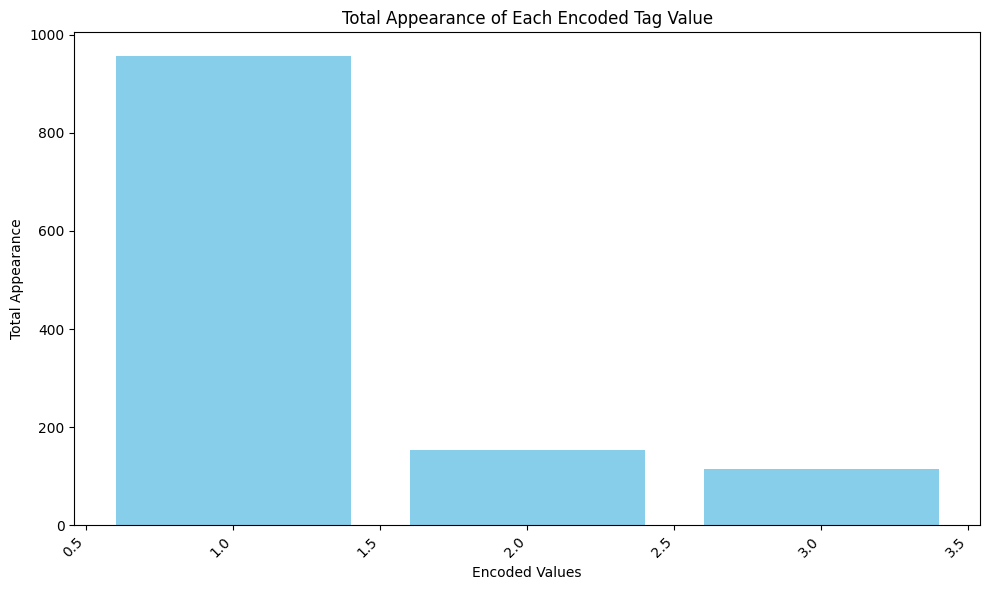

   tags_numeric  count
0             1    957
1             2    154
2             3    114


In [ ]:
# Step 1: Calculate the total appearance of each encoded value
encoded_value_counts = df['tags_numeric'].value_counts()

# Step 2: Convert to a DataFrame for easier plotting
encoded_value_counts_df = encoded_value_counts.reset_index()
encoded_value_counts_df.columns = ['tags_numeric', 'count']

# Step 3: Plot the total appearance of each encoded value
plt.figure(figsize=(10, 6))
plt.bar(encoded_value_counts_df['tags_numeric'], encoded_value_counts_df['count'], color='skyblue')

# Add labels and title
plt.xlabel('Encoded Values')
plt.ylabel('Total Appearance')
plt.title('Total Appearance of Each Encoded Tag Value')

# Rotate the x labels for better visibility if needed
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.tight_layout()
plt.show()

# Display the top counts as a table (optional)
print(encoded_value_counts_df.head())

# Handling Skewness

### Box-Cox Transformation of friendsCount and followersCount

In [ ]:
# Box-Cox transformation requires positive values, so we add 1 to avoid zero issues
df['followersCount_boxcox'], follower_lambda = stats.boxcox(df['followersCount'] + 1)
df['friendsCount_boxcox'], friends_lambda = stats.boxcox(df['friendsCount'] + 1)

In [ ]:
# Visualize the distribution before and after transformations
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0.5, 1.0, 'Follower Count (Original)')

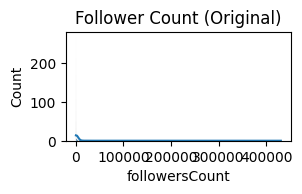

In [ ]:
# Original distributions
plt.subplot(3, 2, 1)
sns.histplot(df['followersCount'], kde=True)
plt.title('Follower Count (Original)')

Text(0.5, 1.0, 'Friends Count (Original)')

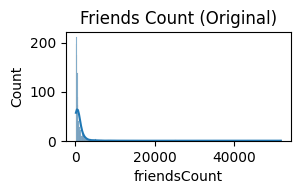

In [ ]:
plt.subplot(3, 2, 2)
sns.histplot(df['friendsCount'], kde=True)
plt.title('Friends Count (Original)')

Text(0.5, 1.0, 'Follower Count (Box-Cox Transformed)')

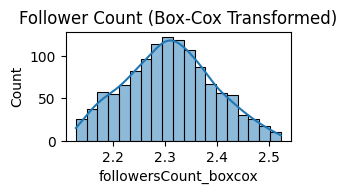

In [ ]:
# Box-Cox transformed distributions
plt.subplot(3, 2, 5)
sns.histplot(df['followersCount_boxcox'], kde=True)
plt.title('Follower Count (Box-Cox Transformed)')

Text(0.5, 1.0, 'Friends Count (Box-Cox Transformed)')

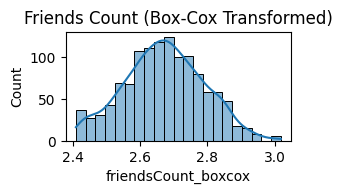

In [ ]:
plt.subplot(3, 2, 6)
sns.histplot(df['friendsCount_boxcox'], kde=True)
plt.title('Friends Count (Box-Cox Transformed)')

### Box-Cox Transformation of friends_count

In [ ]:
# Step 1: Count the number of friends for each row
df['friends_count'] = df['friends'].apply(len)

# Step 2: Check the skewness of the distribution
initial_skewness = skew(df['friends_count'])
print(f"Initial skewness: {initial_skewness}")

Initial skewness: 6.316671803008501


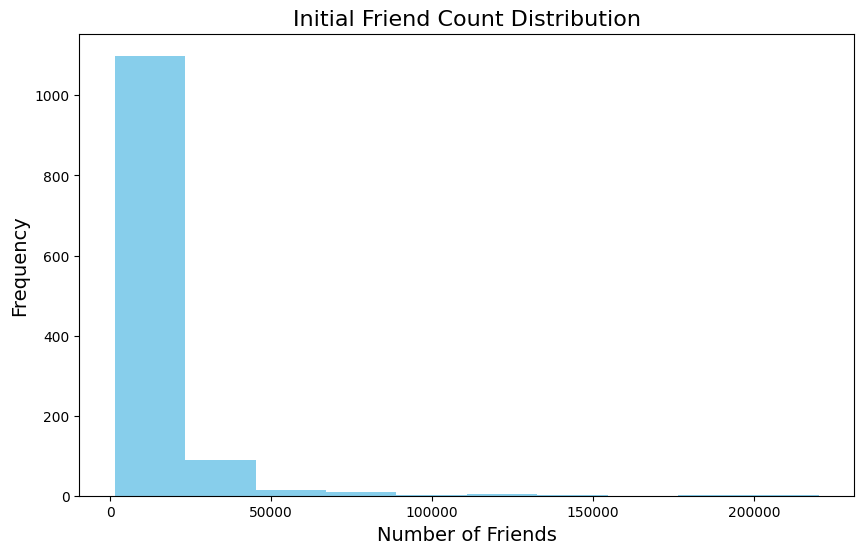

In [ ]:
# Step 3: Visualize the initial distribution
plt.figure(figsize=(10, 6))
plt.hist(df['friends_count'], bins=10, color='skyblue')
plt.title('Initial Friend Count Distribution', fontsize=16)
plt.xlabel('Number of Friends', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [ ]:
df['friend_count_boxcox'], fitted_lambda = boxcox(df['friends_count'])

# Step 4: Check the skewness after transformation
transformed_skewness_boxcox = skew(df['friend_count_boxcox'])
print(f"Skewness after box-cox transformation: {transformed_skewness_boxcox}")

Skewness after box-cox transformation: 0.0353952096577461


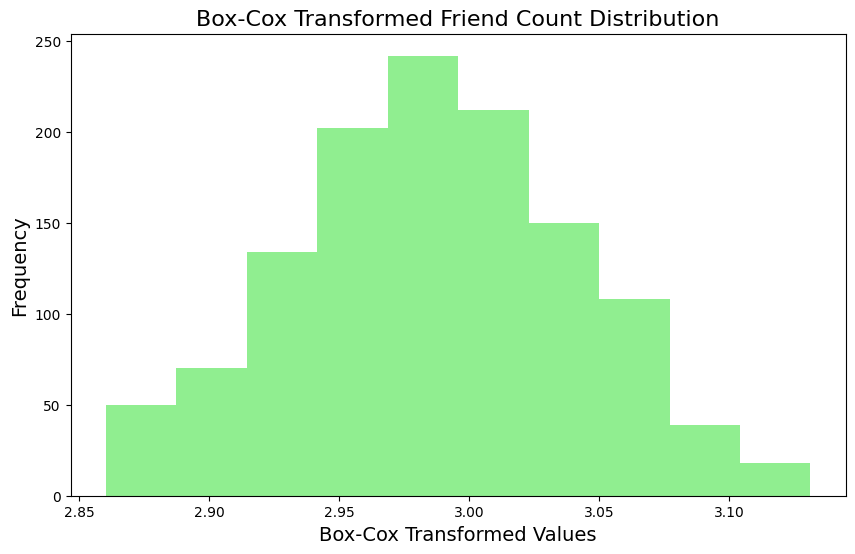

In [ ]:
# Step 5: Visualize the transformed distribution
plt.figure(figsize=(10, 6))
plt.hist(df['friend_count_boxcox'], bins=10, color='lightgreen')
plt.title('Box-Cox Transformed Friend Count Distribution', fontsize=16)
plt.xlabel('Box-Cox Transformed Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Visualization / Exploratory Data Analysis

In [ ]:
# Find the screenName with the highest followersCount, their count, and tags
most_followers_index = df['followersCount'].idxmax()
most_followers_user = df.loc[most_followers_index, 'screenName']
most_followers_count = df.loc[most_followers_index, 'followersCount']
most_followers_tags = df.loc[most_followers_index, 'tags']

print(f"The screenName with the most followers is: {most_followers_user}, with {most_followers_count} followers and tags: {most_followers_tags}.")

The screenName with the most followers is: opry, with 431079 followers and tags: [ "#nationaldogday" ].


## Top Account with Most Followers

In [ ]:
# Get the top 30 users with the most followers, including tags and lang
top_50_followers = df.nlargest(50, 'followersCount')[['screenName', 'followersCount', 'tags']]

print(top_50_followers)

           screenName  followersCount                       tags
650              opry          431079      [ "#nationaldogday" ]
391              10TV          217873      [ "#nationaldogday" ]
601     beforeyouexit          217586      [ "#nationaldogday" ]
282      CharlesEsten          153956      [ "#nationaldogday" ]
110    McClain_on_NFL          121531      [ "#nationaldogday" ]
551   TaylorSpreitler           91542      [ "#nationaldogday" ]
1116       MvrioLopez           71832      [ "#nationaldogday" ]
1221     genofsavings           67163      [ "#nationaldogday" ]
274   DiazBrothers209           56860      [ "#nationaldogday" ]
689        Winexxfine           52346      [ "#nationaldogday" ]
413   kylestanleygolf           48012      [ "#nationaldogday" ]
1016         EntEarth           41074      [ "#nationaldogday" ]
1077   CoachLouBeaird           39924      [ "#nationaldogday" ]
375     MorganReeseXO           39675      [ "#nationaldogday" ]
887         rudysarzo    

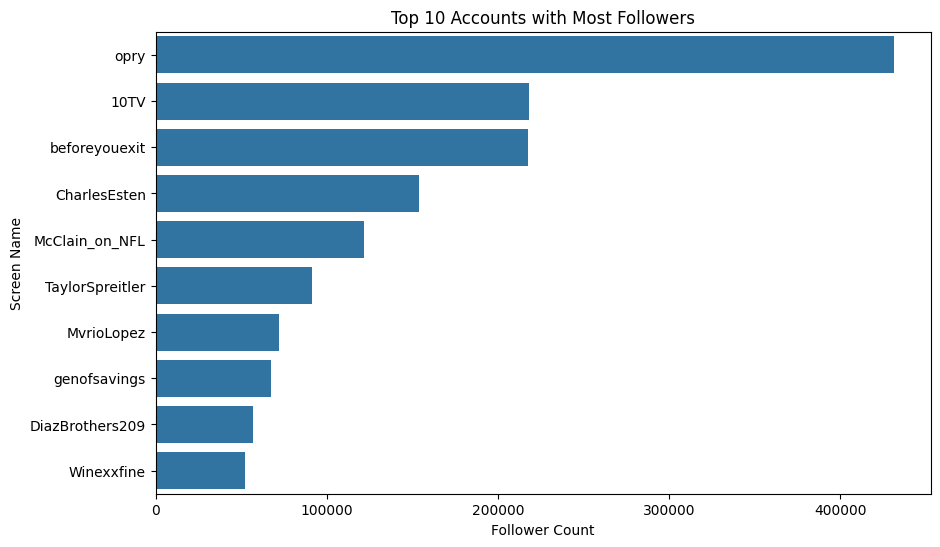

In [ ]:
# Top 10 Accounts with Most Followers
top_10_followers = df.nlargest(10, 'followersCount')
plt.figure(figsize=(10, 6))
sns.barplot(x='followersCount', y='screenName', data=top_10_followers)
plt.title('Top 10 Accounts with Most Followers')
plt.xlabel('Follower Count')
plt.ylabel('Screen Name')
plt.show()

## Top 10 most use tags

In [ ]:
# Count the frequency of each tag and get the top 10
top_10_tags = df['tags'].str.split(',').explode().str.strip().value_counts().nlargest(10)

print(top_10_tags)

tags
[ "#nationaldogday" ]        957
[ "#respecttylerjoseph" ]    154
[ "#gloryoutnow" ]            24
[ "#backtohogwarts" ]         10
[ "#narcos" ]                  9
[ "steve rogers" ]             6
[ "#bundesliga" ]              5
[ "bournemouth" ]              5
[ "halsey" ]                   4
[ "#louisweloveyou" ]          4
Name: count, dtype: int64


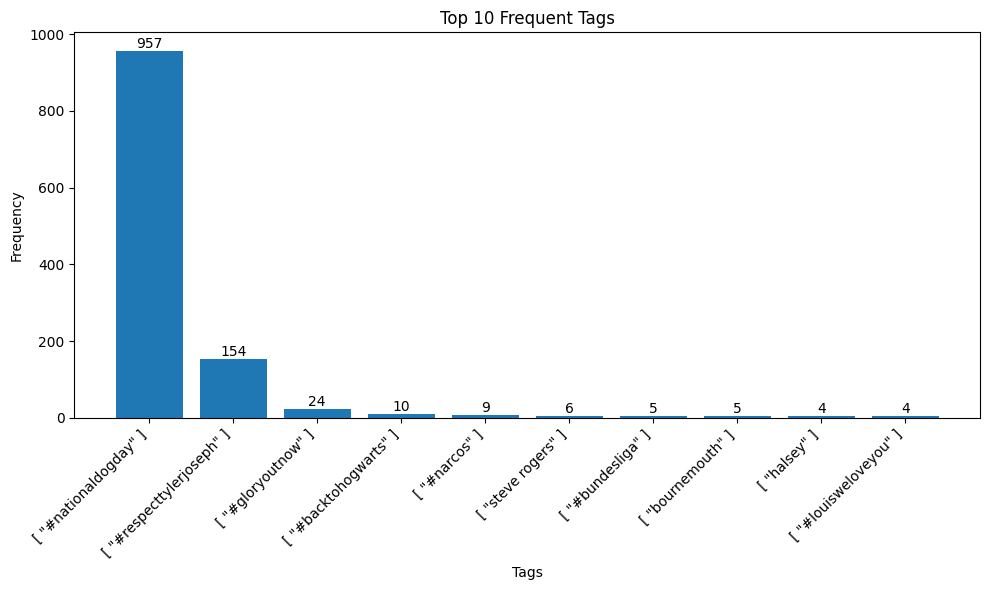

In [ ]:
# Count the frequency of each tag and get the top 10
top_10_tags = df['tags'].str.split(',').explode().str.strip().value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_tags.index, top_10_tags.values)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Top 10 Frequent Tags')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add count labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

## Distribution of Followers Count

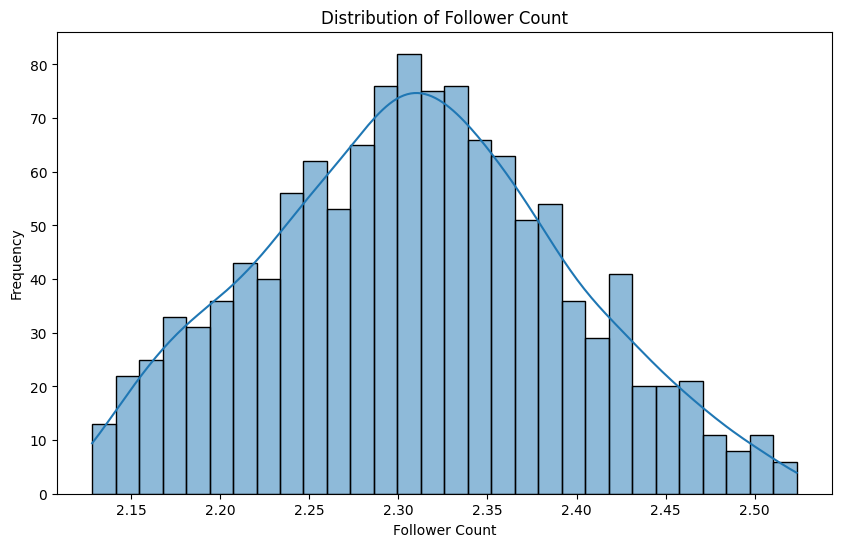

In [ ]:
# 1. Distribution of Follower Count
plt.figure(figsize=(10, 6))
sns.histplot(df['followersCount_boxcox'], bins=30, kde=True)
plt.title('Distribution of Follower Count')
plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.show()

## Distribution of Friends Count

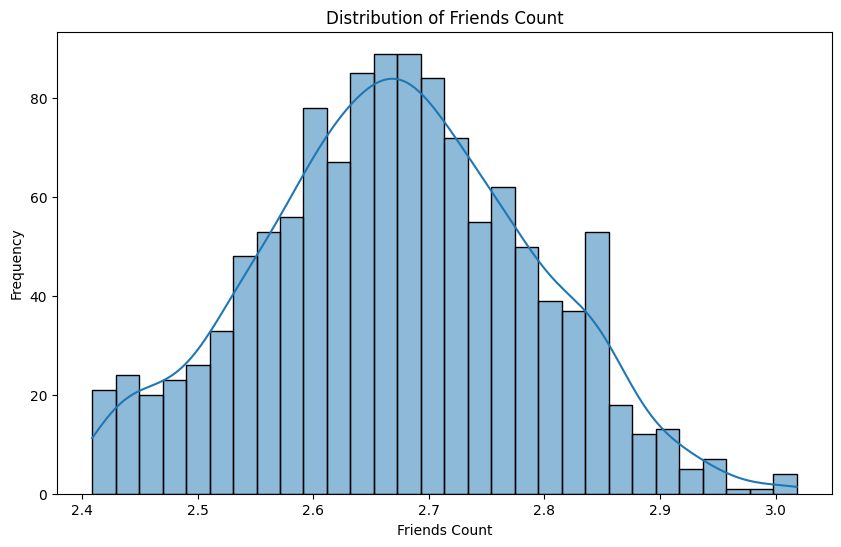

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['friendsCount_boxcox'], bins=30, kde=True)
plt.title('Distribution of Friends Count')
plt.xlabel('Friends Count')
plt.ylabel('Frequency')
plt.show()

## Follower Count vs Friends Count

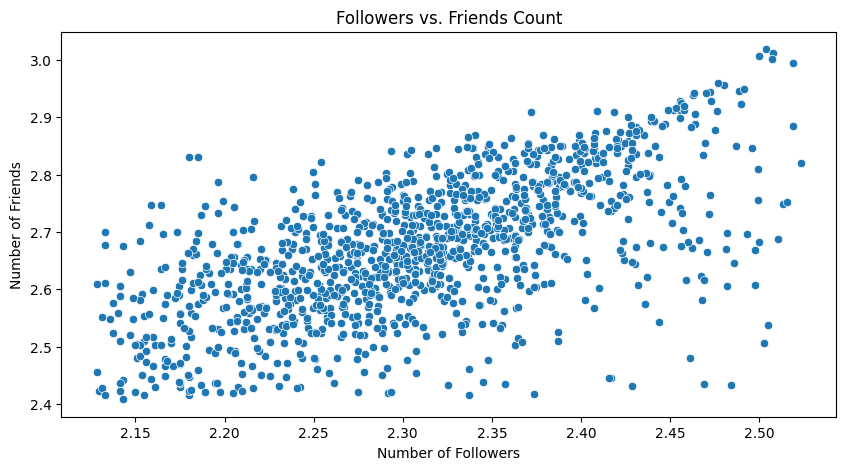

In [ ]:
# Scatter plot of followers vs. friends count
plt.figure(figsize=(10, 5))
sns.scatterplot(x='followersCount_boxcox', y='friendsCount_boxcox', data=df)
plt.title('Followers vs. Friends Count')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Friends')
plt.show()

## Distribution of Friends Network size

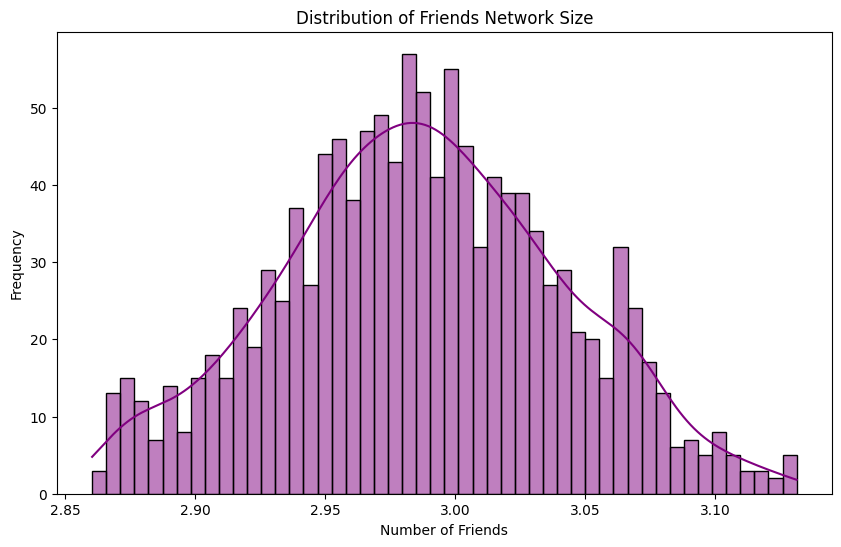

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['friend_count_boxcox'], kde=True, color='purple', bins=50)
plt.title('Distribution of Friends Network Size')
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.show()

## Correlation Heatmap

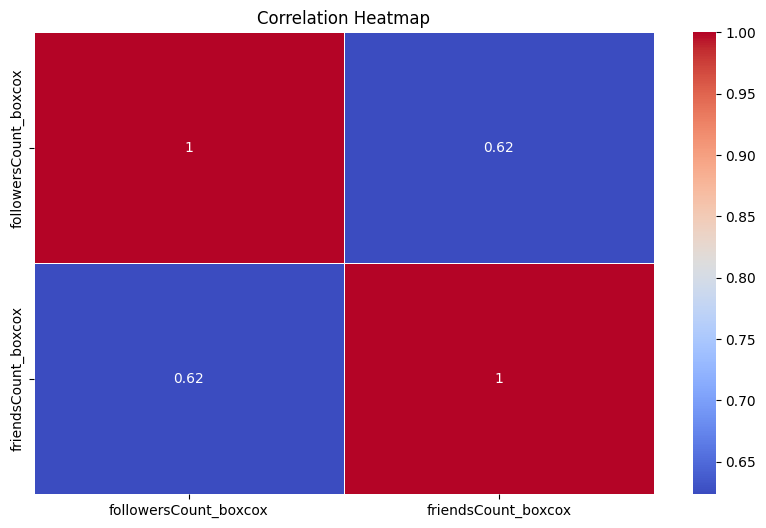

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[['followersCount_boxcox', 'friendsCount_boxcox']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Clustering Techniques

## DBSCAN

In [ ]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

In [ ]:
# Prepare the feature matrix using the three labels
X = df[['followersCount_boxcox', 'friendsCount_boxcox', 'tags_numeric']].values

In [ ]:
# Apply DBSCAN clustering with adjusted parameters
dbscan = DBSCAN(eps=0.7, min_samples=4)  # Adjusted values
labels = dbscan.fit_predict(X)

In [ ]:
# Add cluster labels to the DataFrame
df['DBSCAN_Labels'] = labels

In [ ]:
# Visualize the distribution of labels
unique_labels, counts = np.unique(labels, return_counts=True)
print("Cluster counts:", dict(zip(unique_labels, counts)))

Cluster counts: {0: 957, 1: 114, 2: 154}


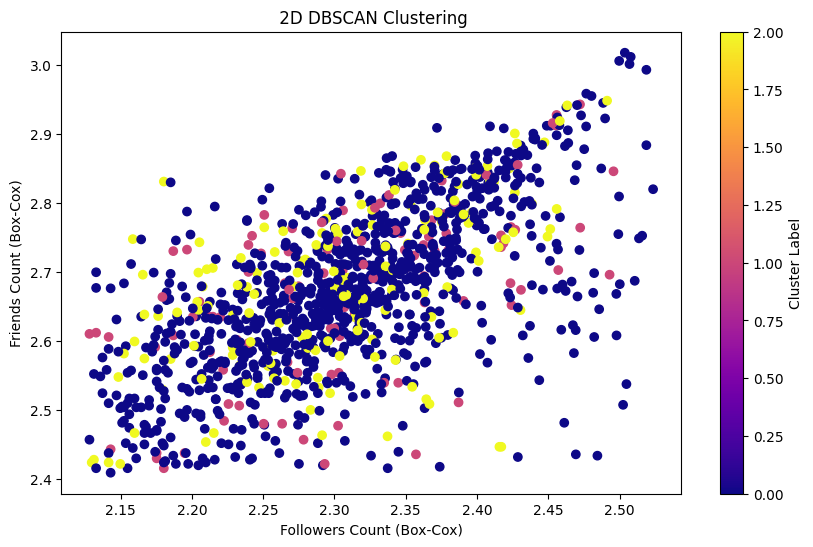

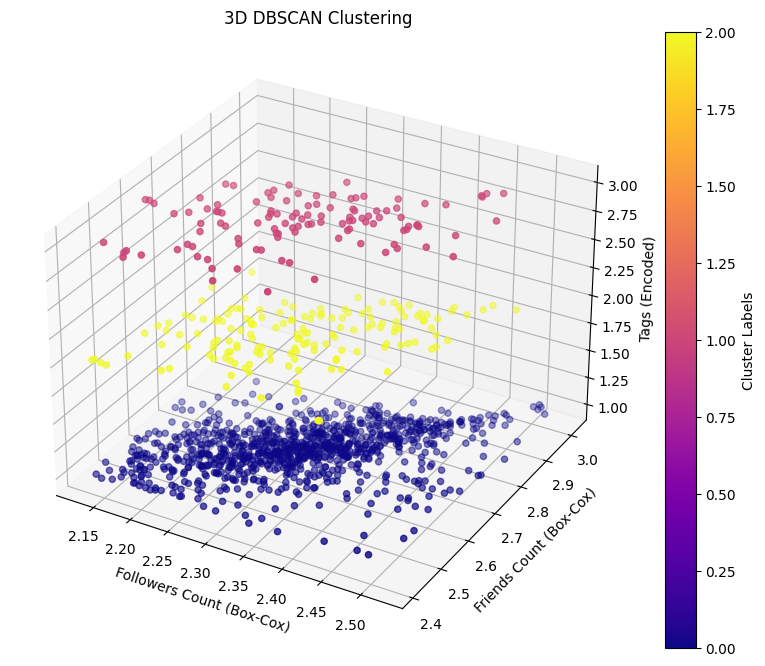

In [ ]:
# 2D Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=labels, cmap='plasma', marker='o')
plt.title(' 2D DBSCAN Clustering')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# Create a 3D scatter plot using the three labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the three dimensions: 'followersCount_boxcox', 'friendsCount_boxcox', and 'tags_encoded'
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=labels, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title('3D DBSCAN Clustering')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()

In [ ]:
# Evaluation metrics (Optional)
core_samples_mask = labels != -1
X_core = X[core_samples_mask]
labels_core = labels[core_samples_mask]

if len(np.unique(labels_core)) > 1:
    silhouette_avg = silhouette_score(X_core, labels_core)
    print(f'Silhouette Score: {silhouette_avg:.3f}')

db_score = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin Score: {db_score:.3f}')

n_noise = np.sum(labels == -1)
n_total = len(labels)
noise_percentage = (n_noise / n_total) * 100
print(f'Noise percentage: {noise_percentage:.2f}%')

Silhouette Score: 0.828
Davies-Bouldin Score: 0.253
Noise percentage: 0.00%


### Fine-Tuning DBSCAN


In [ ]:
# Define the ranges for hyperparameters
eps_values = [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0]
min_samples_values = [3, 4, 5, 6, 7, 8, 9, 10]

# Initialize variables to store the best model details for each metric
best_combined_score = -np.inf  # Start with the worst score
best_eps = None
best_min_samples = None
best_labels = None

# Iterate through the parameter values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Only calculate metrics for clusters with more than one cluster
        if len(np.unique(labels)) > 1:
            # Compute the performance metrics
            silhouette = silhouette_score(X, labels)
            davies_bouldin = davies_bouldin_score(X, labels)
            calinski_harabasz = calinski_harabasz_score(X, labels)

            print(f'Eps: {eps}, Min_samples: {min_samples}, '
                  f'Silhouette Score: {silhouette}, '
                  f'Davies-Bouldin Index: {davies_bouldin}, '
                  f'Calinski-Harabasz Index: {calinski_harabasz}')

            # Combine the scores (weights can be adjusted as needed)
            combined_score = silhouette + calinski_harabasz - davies_bouldin  # Higher is better for Silhouette and CHI, lower for DBI

            # Update the best model if the combined score is higher
            if combined_score > best_combined_score:
                best_combined_score = combined_score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels
                best_silhouette_score = silhouette
                best_davies_bouldin_score = davies_bouldin
                best_calinski_harabasz_score = calinski_harabasz

Eps: 0.1, Min_samples: 3, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Eps: 0.1, Min_samples: 4, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Eps: 0.1, Min_samples: 5, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Eps: 0.1, Min_samples: 6, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Eps: 0.1, Min_samples: 7, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Eps: 0.1, Min_samples: 8, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Eps: 0.1, Min_samples: 9, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.253204048223

In [ ]:
# Print the best model's hyperparameters and performance
print("\nBest Model:")
print(f'Eps: {best_eps}, Min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette_score}')
print(f'Corresponding Davies-Bouldin Index: {best_davies_bouldin_score}')
print(f'Corresponding Calinski-Harabasz Index: {best_calinski_harabasz_score}')


Best Model:
Eps: 0.1, Min_samples: 3, Best Silhouette Score: 0.8282840514257682
Corresponding Davies-Bouldin Index: 0.2532040482230817
Corresponding Calinski-Harabasz Index: 11740.531442653524


### Visualization after Fine-Tuning DBSCAN

Best Cluster counts: {0: 957, 1: 114, 2: 154}


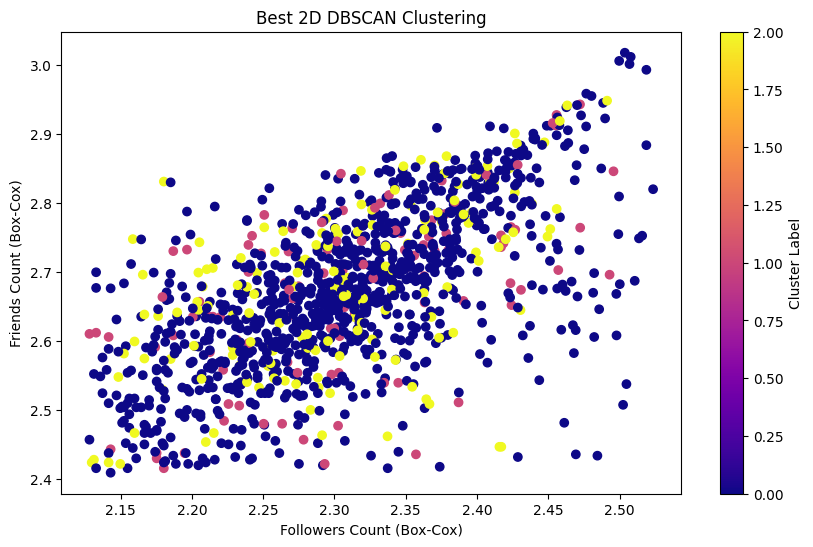

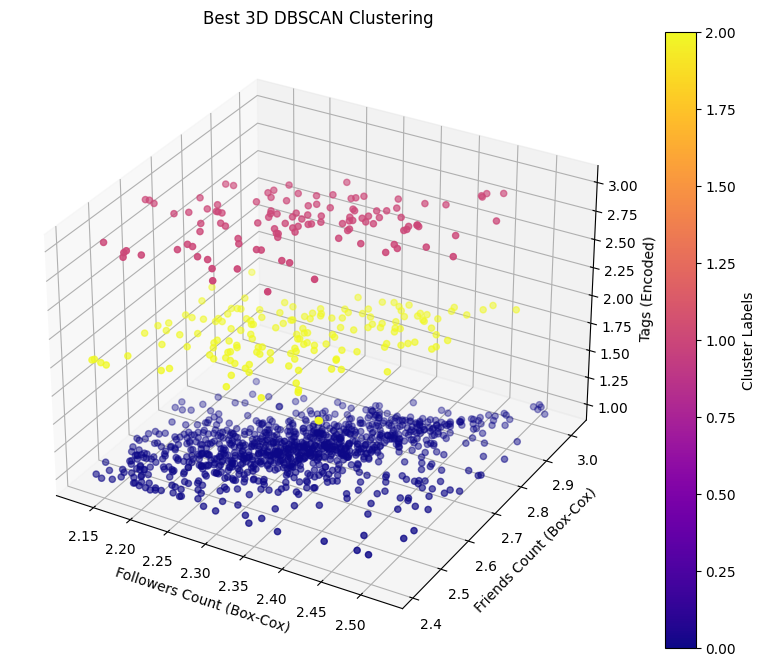

In [ ]:
# Assign the best labels to the DataFrame
df['DBSCAN_Best_Labels'] = best_labels

# Visualize the distribution of the best labels
unique_labels, counts = np.unique(best_labels, return_counts=True)
print("Best Cluster counts:", dict(zip(unique_labels, counts)))

# 2D Scatter Plot for the best model
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=best_labels, cmap='plasma', marker='o')
plt.title('Best 2D DBSCAN Clustering')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3D scatter plot for the best model
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three dimensions: 'followersCount_boxcox', 'friendsCount_boxcox', and 'tags_encoded'
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=best_labels, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title('Best 3D DBSCAN Clustering')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()

## Mean Shift Clustering

In [ ]:
# Import necessary libraries
from sklearn.cluster import MeanShift

In [ ]:
# Apply Mean Shift clustering
mean_shift = MeanShift()
mean_shift.fit(X)
labels = mean_shift.labels_

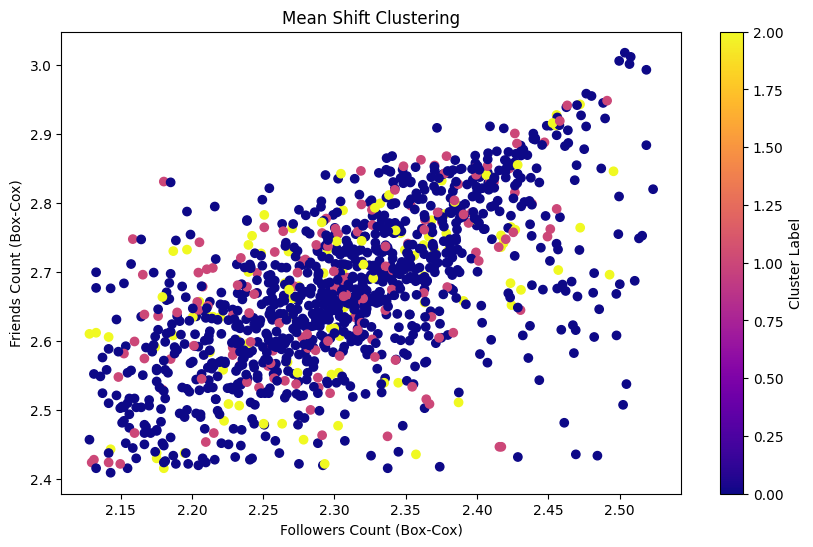

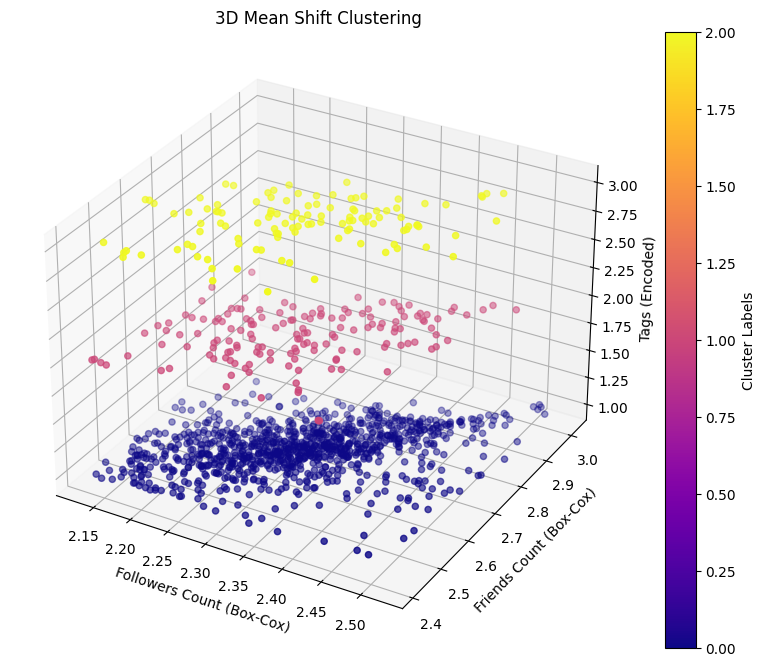

In [ ]:
# Add cluster labels to the DataFrame
df['MeanShift_Labels'] = labels

# 2D Scatter Plot using 'followersCount_boxcox' and 'friendsCount_boxcox'
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=labels, cmap='plasma', marker='o')
plt.title('Mean Shift Clustering')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3D Scatter Plot using 'followersCount_boxcox', 'friendsCount_boxcox', and 'tags_encoded'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=labels, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title('3D Mean Shift Clustering')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()

In [ ]:
# Evaluation metrics (Optional)
core_samples_mask = labels != -1
X_core = X[core_samples_mask]
labels_core = labels[core_samples_mask]

# Silhouette Score
if len(np.unique(labels_core)) > 1:
    silhouette_avg = silhouette_score(X_core, labels_core)
    print(f'Silhouette Score: {silhouette_avg:.3f}')

# Davies-Bouldin Score
db_score = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin Score: {db_score:.3f}')

# Noise percentage (for Mean Shift, this may not apply, so it's omitted)
n_noise = np.sum(labels == -1)
n_total = len(labels)
noise_percentage = (n_noise / n_total) * 100
print(f'Noise percentage: {noise_percentage:.2f}%')

Silhouette Score: 0.828
Davies-Bouldin Score: 0.253
Noise percentage: 0.00%


### Fine-Tuning Mean Shift

In [ ]:
# Define the range of bandwidth values for fine-tuning
bandwidth_values = [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 1.0]

# Initialize variables to store the best model details
best_combined_score = -np.inf  # Start with the worst score
best_bandwidth = None
best_labels = None

# Iterate through the parameter values
for bandwidth in bandwidth_values:
    # Apply Mean Shift with the current bandwidth value
    mean_shift = MeanShift(bandwidth=bandwidth)
    labels = mean_shift.fit_predict(X)

    # Only calculate metrics for clusters with more than one cluster
    if len(np.unique(labels)) > 1:
        # Compute the performance metrics
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)

        print(f'Bandwidth: {bandwidth}, Silhouette Score: {silhouette}, '
              f'Davies-Bouldin Index: {davies_bouldin}, '
              f'Calinski-Harabasz Index: {calinski_harabasz}')

        # Combine the scores (weights can be adjusted as needed)
        combined_score = silhouette + calinski_harabasz - davies_bouldin  # Higher is better for Silhouette and CHI, lower for DBI

        # Update the best model if the combined score is higher
        if combined_score > best_combined_score:
            best_combined_score = combined_score
            best_bandwidth = bandwidth
            best_labels = labels
            best_silhouette_score = silhouette
            best_davies_bouldin_score = davies_bouldin
            best_calinski_harabasz_score = calinski_harabasz


Bandwidth: 0.1, Silhouette Score: 0.7388352143193163, Davies-Bouldin Index: 0.6591415058267308, Calinski-Harabasz Index: 5407.599003942972
Bandwidth: 0.15, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Bandwidth: 0.2, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Bandwidth: 0.25, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Bandwidth: 0.3, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Bandwidth: 0.35, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Bandwidth: 0.4, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
Bandwidth: 0.45, S

In [ ]:
# Print the best model's hyperparameters and performance
print("\nBest Model:")
print(f'Bandwidth: {best_bandwidth}, Best Silhouette Score: {best_silhouette_score}')
print(f'Corresponding Davies-Bouldin Index: {best_davies_bouldin_score}')
print(f'Corresponding Calinski-Harabasz Index: {best_calinski_harabasz_score}')


Best Model:
Bandwidth: 0.15, Best Silhouette Score: 0.8282840514257682
Corresponding Davies-Bouldin Index: 0.2532040482230817
Corresponding Calinski-Harabasz Index: 11740.531442653524


### Visualization after Fine-Tuning Mean Shift

Best Cluster counts: {0: 957, 1: 154, 2: 114}


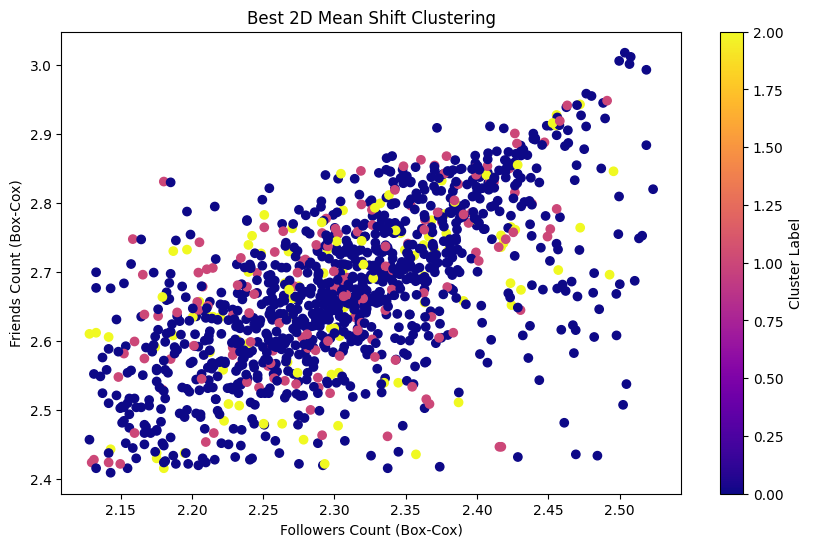

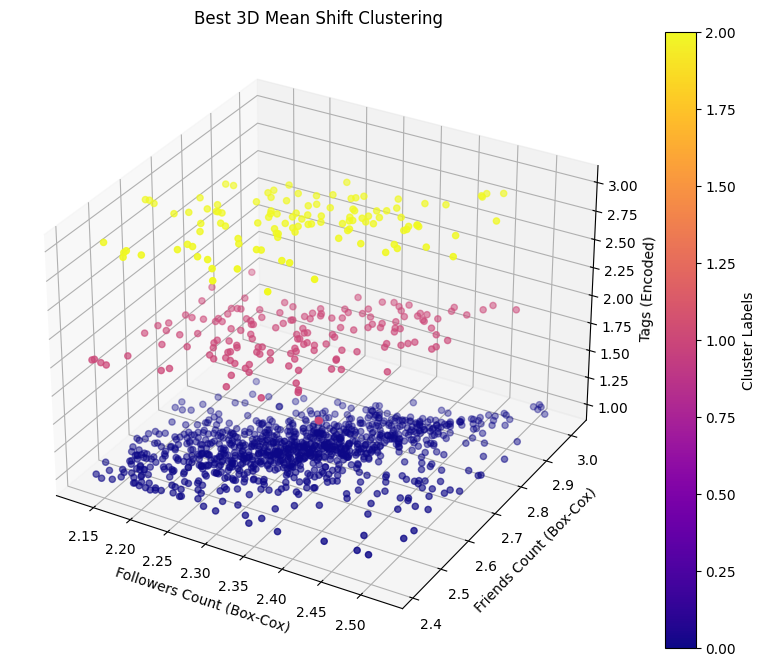

In [ ]:
# Assign the best labels to the DataFrame
df['MeanShift_Best_Labels'] = best_labels

# Visualize the distribution of the best labels
unique_labels, counts = np.unique(best_labels, return_counts=True)
print("Best Cluster counts:", dict(zip(unique_labels, counts)))

# 2D Scatter Plot for the best model
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=best_labels, cmap='plasma', marker='o')
plt.title('Best 2D Mean Shift Clustering')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3D scatter plot for the best model
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three dimensions: 'followersCount_boxcox', 'friendsCount_boxcox', and 'tags_numeric'
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=best_labels, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title('Best 3D Mean Shift Clustering')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()

## Gaussian Mixture Model (GMM)

In [ ]:
# Import necessary libraries
from sklearn.mixture import GaussianMixture

In [ ]:
# Apply Gaussian Mixture Model clustering
# Specify the number of components (clusters) you want GMM to try to fit
n_components = 4  # You can change this number based on your data
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

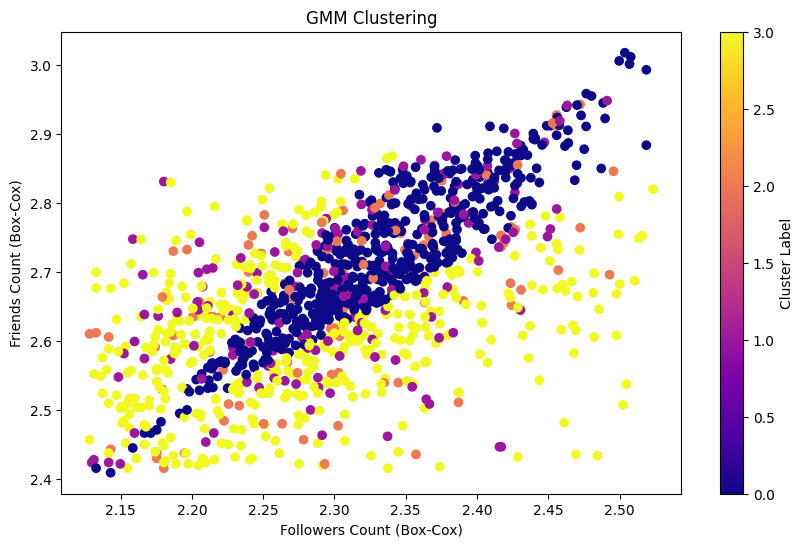

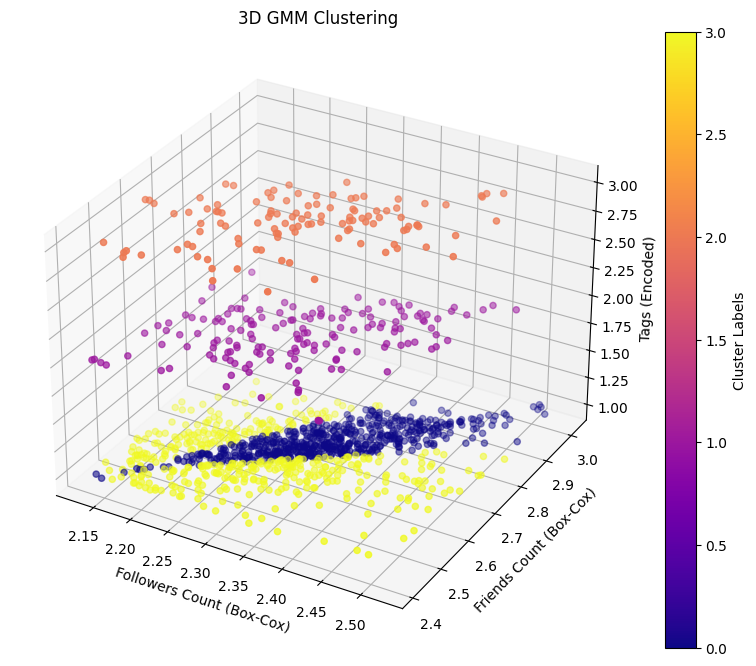

In [ ]:
# Add cluster labels to the DataFrame
df['GMM_Labels'] = labels

# 2D Scatter Plot using 'followersCount_boxcox' and 'friendsCount_boxcox'
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=labels, cmap='plasma', marker='o')
plt.title('GMM Clustering')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3D Scatter Plot using 'followersCount_boxcox', 'friendsCount_boxcox', and 'tags_encoded'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=labels, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title('3D GMM Clustering')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()

In [ ]:
# Evaluation metrics
core_samples_mask = labels != -1
X_core = X[core_samples_mask]
labels_core = labels[core_samples_mask]

# Silhouette Score
if len(np.unique(labels_core)) > 1:
    silhouette_avg = silhouette_score(X_core, labels_core)
    print(f'Silhouette Score: {silhouette_avg:.3f}')

# Davies-Bouldin Score
db_score = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin Score: {db_score:.3f}')

# Noise percentage (for GMM, this may not apply, so it's omitted)
n_noise = np.sum(labels == -1)
n_total = len(labels)
noise_percentage = (n_noise / n_total) * 100
print(f'Noise percentage: {noise_percentage:.2f}%')

Silhouette Score: 0.322
Davies-Bouldin Score: 0.973
Noise percentage: 0.00%


### Fine-Tuning GMM

In [ ]:
components = [2, 3, 4, 5, 6, 7, 8, 9, 10]
cov_types = ['full', 'tied', 'diag', 'spherical']

# Initialize variables to store the best model details
best_combined_score = -np.inf  # Start with the worst score
best_n_components = None
best_cov_type = None
best_labels = None

# Iterate through all combinations of components and covariance types
for n in components:
    for cov_type in cov_types:
        # Apply Gaussian Mixture Model with the current parameters
        gmm = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=42)
        labels = gmm.fit_predict(X)

        # Only calculate metrics if there is more than one cluster
        if len(np.unique(labels)) > 1:
            # Compute performance metrics
            silhouette = silhouette_score(X, labels)
            davies_bouldin = davies_bouldin_score(X, labels)
            calinski_harabasz = calinski_harabasz_score(X, labels)
            aic = gmm.aic(X)
            bic = gmm.bic(X)

            print(f'n_components: {n}, Covariance type: {cov_type}, Silhouette Score: {silhouette}, '
                  f'Davies-Bouldin Index: {davies_bouldin}, Calinski-Harabasz Index: {calinski_harabasz}, '
                  f'AIC: {aic}, BIC: {bic}')

            # Combine the scores (weights can be adjusted as needed)
            combined_score = (silhouette + calinski_harabasz) - (davies_bouldin + (aic + bic) / 2)  # Higher is better for S and CHI, lower for DBI, AIC, BIC

            # Update the best model based on the combined score
            if combined_score > best_combined_score:
                best_combined_score = combined_score
                best_davies_bouldin_score = davies_bouldin
                best_calinski_harabasz_score = calinski_harabasz
                best_aic = aic
                best_bic = bic
                best_n_components = n
                best_cov_type = cov_type
                best_labels = labels

n_components: 2, Covariance type: full, Silhouette Score: 0.8083285651967164, Davies-Bouldin Index: 0.4443079797835043, Calinski-Harabasz Index: 5713.302506884277, AIC: -14719.787087059362, BIC: -14622.683860722764
n_components: 2, Covariance type: tied, Silhouette Score: 0.8083285651967164, Davies-Bouldin Index: 0.4443079797835043, Calinski-Harabasz Index: 5713.302506884277, AIC: -3760.096357706501, BIC: -3693.657308107776
n_components: 2, Covariance type: diag, Silhouette Score: 0.8083285651967164, Davies-Bouldin Index: 0.4443079797835043, Calinski-Harabasz Index: 5713.302506884277, AIC: -14122.8983160213, BIC: -14056.459266422575
n_components: 2, Covariance type: spherical, Silhouette Score: 0.8083285651967164, Davies-Bouldin Index: 0.4443079797835043, Calinski-Harabasz Index: 5713.302506884277, AIC: -4494.209050938382, BIC: -4448.212785831573
n_components: 3, Covariance type: full, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Ind

In [ ]:
# Print the best model's parameters and performance
print("\nBest Model:")
print(f'n_components: {best_n_components}, Covariance type: {best_cov_type}, Best Silhouette Score: {best_silhouette_score}')
print(f'Corresponding Davies-Bouldin Index: {best_davies_bouldin_score}')
print(f'Corresponding Calinski-Harabasz Index: {best_calinski_harabasz_score}')
print(f'Best AIC: {best_aic}')
print(f'Best BIC: {best_bic}')


Best Model:
n_components: 4, Covariance type: tied, Best Silhouette Score: 0.8282840514257682
Corresponding Davies-Bouldin Index: 0.5297560904014091
Corresponding Calinski-Harabasz Index: 13651.855808281269
Best AIC: -17935.227835087095
Best BIC: -17827.90321650454


### Visualization after Fine-Tuning GMM

Best Cluster counts: {0: 400, 1: 114, 2: 154, 3: 557}


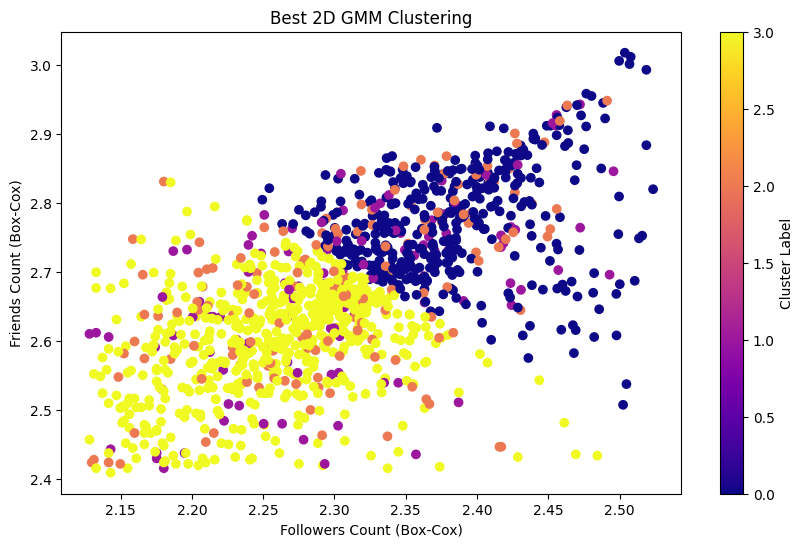

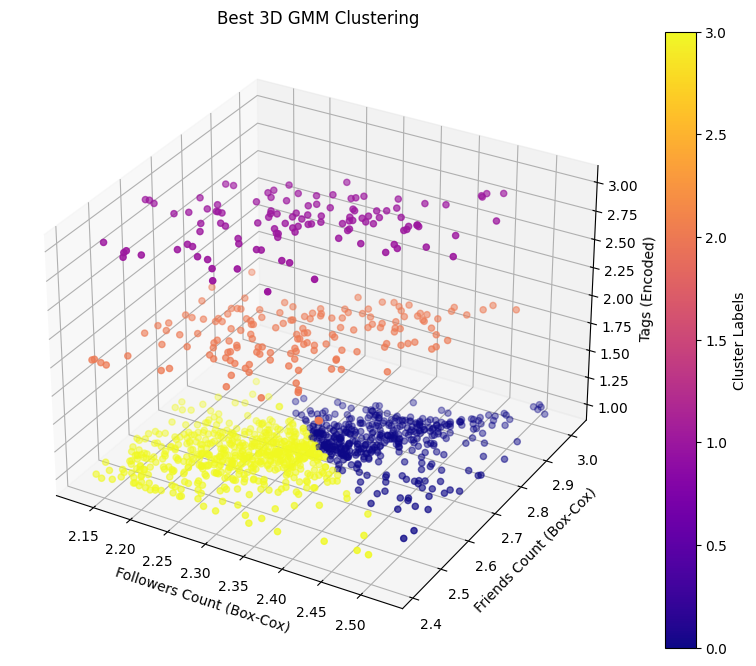

In [ ]:

# Assign the best labels to the DataFrame
df['GMM_Best_Labels'] = best_labels

# Visualize the distribution of the best labels
unique_labels, counts = np.unique(best_labels, return_counts=True)
print("Best Cluster counts:", dict(zip(unique_labels, counts)))

# 2D Scatter Plot for the best model
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=best_labels, cmap='plasma', marker='o')
plt.title('Best 2D GMM Clustering')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3D scatter plot for the best model
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three dimensions: 'followersCount_boxcox', 'friendsCount_boxcox', and 'tags_numeric'
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=best_labels, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title('Best 3D GMM Clustering')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()

## Spectral Clustering

### 1.nearest_neighbors

In [ ]:
# Import necessary libraries
from sklearn.cluster import SpectralClustering

In [ ]:
# Preprocess the data: Standardize the features
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
#hyperparameters,fit
spectral_cluster_nn = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans',n_neighbors=25, random_state=42)
spectral_labels_nn = spectral_cluster_nn.fit_predict(X_scaled)

In [ ]:
df['Spectral Cluster'] = spectral_labels_nn


In [ ]:
# Visualize the distribution of labels
unique_labels, counts = np.unique(spectral_labels_nn, return_counts=True)
print("Cluster counts:", dict(zip(unique_labels, counts)))

Cluster counts: {0: 114, 1: 545, 2: 412, 3: 154}


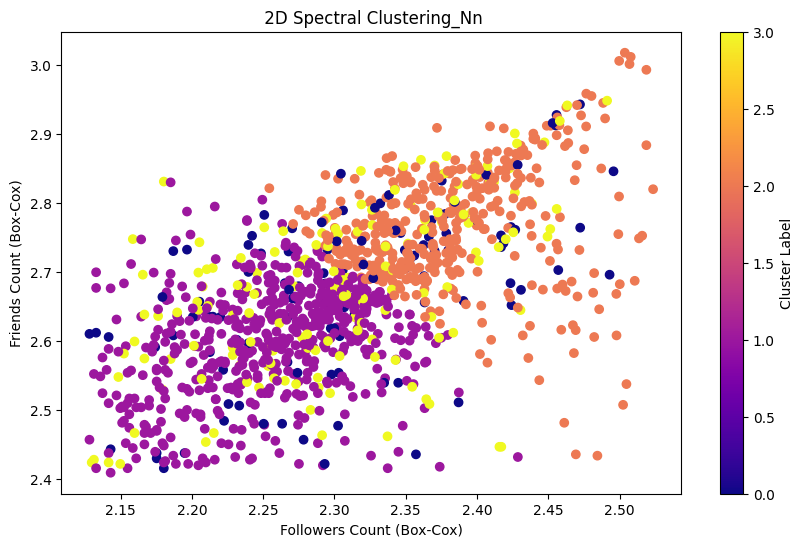

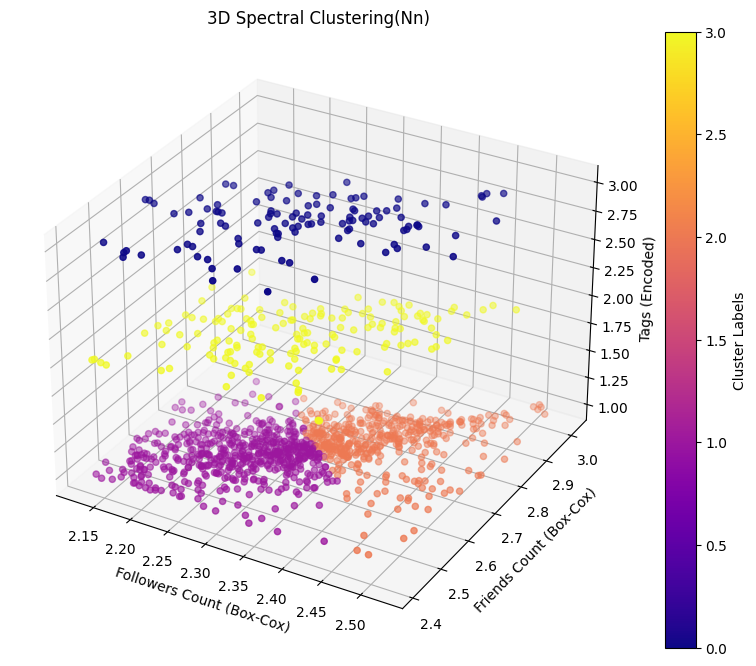

In [ ]:
# 2D Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=spectral_labels_nn, cmap='plasma', marker='o')
plt.title(' 2D Spectral Clustering_Nn')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# Create a 3D scatter plot using the three labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the three dimensions
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=spectral_labels_nn, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title('3D Spectral Clustering(Nn)')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()

### 2.RBF : construct the affinity matrix using a radial basis function (RBF) kernel.

In [ ]:
#hyperparameters,fit(rbf)
spectral_cluster_rbr = SpectralClustering(n_clusters=3, affinity='rbf',)
spectral_labels_rbr = spectral_cluster_rbr.fit_predict(X_scaled)

In [ ]:
df['Spectral Cluster'] = spectral_labels_rbr

In [ ]:
# Visualize the distribution of labels
unique_labels, counts = np.unique(spectral_labels_rbr, return_counts=True)
print("Cluster counts:", dict(zip(unique_labels, counts)))

Cluster counts: {0: 476, 1: 114, 2: 635}


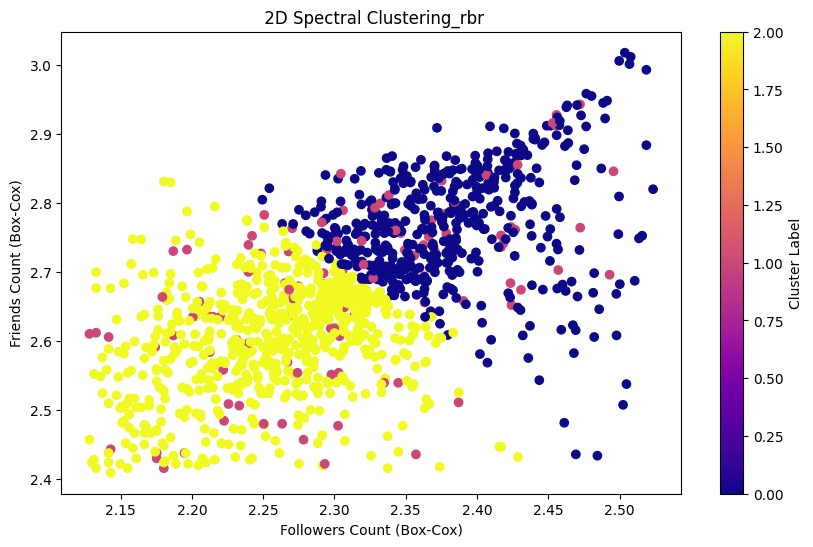

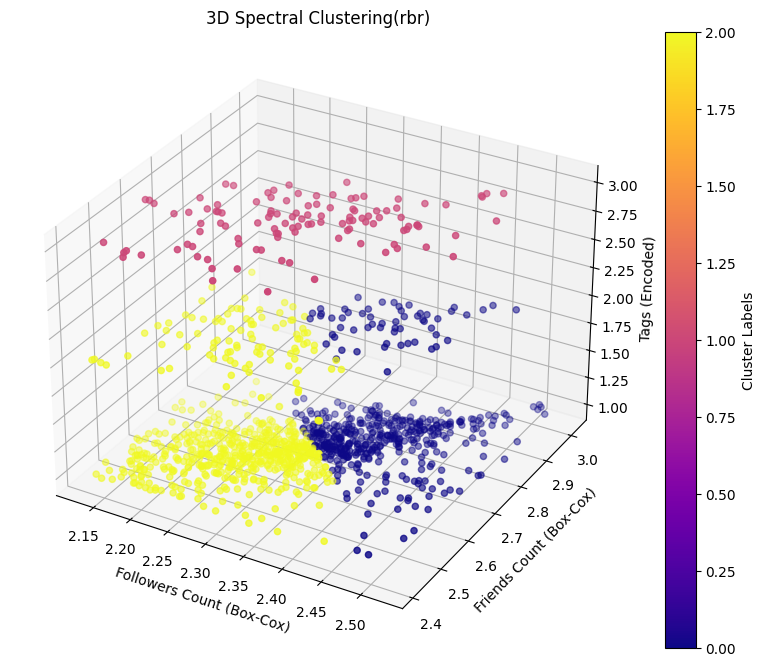

In [ ]:
# 2D Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=spectral_labels_rbr, cmap='plasma', marker='o')
plt.title(' 2D Spectral Clustering_rbr')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# Create a 3D scatter plot using the three labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the three dimensions
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=spectral_labels_rbr, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title('3D Spectral Clustering(rbr)')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Fit the models and get the labels
labels_rbr = spectral_cluster_rbr.fit_predict(X_scaled)
labels_nn = spectral_cluster_nn.fit_predict(X_scaled)

# Initialize the list for silhouette scores
s_scores = []

# Calculate the Silhouette score for both models
if len(np.unique(labels_rbr)) > 1:  # Only compute if more than 1 cluster
    s_scores.append(silhouette_score(X_scaled, labels_rbr))
else:
    s_scores.append(None)  # No valid silhouette score if only 1 cluster

if len(np.unique(labels_nn)) > 1:
    s_scores.append(silhouette_score(X_scaled, labels_nn))
else:
    s_scores.append(None)

print(f"Silhouette Scores: {s_scores}")

# Davies-Bouldin Score
#Davies-Bouldin Index: Lower is better, measures the average similarity ratio of each cluster with the cluster most similar to it.
#Calinski-Harabasz Index: Higher is better, measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion.

db_scores = [davies_bouldin_score(X_scaled, labels_rbr), davies_bouldin_score(X_scaled, labels_nn)]
print(f"Davies-Bouldin Scores: {db_scores}")

# Calinski-Harabasz Score
#Calinski-Harabasz Index: Higher is better, measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion.

ch_scores = [calinski_harabasz_score(X_scaled, labels_rbr), calinski_harabasz_score(X_scaled, labels_nn)]
print(f"Calinski-Harabasz Scores: {ch_scores}")




Silhouette Scores: [0.3877407465616972, 0.3788173653346494]
Davies-Bouldin Scores: [0.881022543315468, 1.3492840319756683]
Calinski-Harabasz Scores: [789.6709194717379, 632.9037290063246]


### Fine-Tuning Spectral Clustering

In [ ]:
# Variables to store the best model details for RBF
best_combined_score_rbf = -np.inf
best_n_clusters_rbf = None
best_labels_rbf = None
best_silhouette_score_rbf = -1
best_davies_bouldin_score_rbf = np.inf
best_calinski_harabasz_score_rbf = -1

# Fine-tuning Spectral Clustering with RBF affinity
for n in range(2, 20):
    spectral_cluster_rbf = SpectralClustering(n_clusters=n, affinity='rbf', random_state=42)
    labels_rbf = spectral_cluster_rbf.fit_predict(X_scaled)

    # Only calculate metrics if there is more than one cluster
    if len(np.unique(labels_rbf)) > 1:
        silhouette_rbf = silhouette_score(X_scaled, labels_rbf)
        davies_bouldin_rbf = davies_bouldin_score(X_scaled, labels_rbf)
        calinski_harabasz_rbf = calinski_harabasz_score(X_scaled, labels_rbf)

        print(f"n_clusters_rbf={n}, Silhouette Score: {silhouette_rbf}, "
              f"Davies-Bouldin Index: {davies_bouldin_rbf}, Calinski-Harabasz Index: {calinski_harabasz_rbf}")

        # Combine the scores (weights can be adjusted as needed)
        combined_score_rbf = silhouette_rbf + calinski_harabasz_rbf - davies_bouldin_rbf

        # Update the best model for RBF based on combined score
        if combined_score_rbf > best_combined_score_rbf:
            best_combined_score_rbf = combined_score_rbf
            best_n_clusters_rbf = n
            best_labels_rbf = labels_rbf
            best_silhouette_score_rbf = silhouette_rbf
            best_davies_bouldin_score_rbf = davies_bouldin_rbf
            best_calinski_harabasz_score_rbf = calinski_harabasz_rbf

# Variables to store the best model details for Nearest Neighbors
best_combined_score_nn = -np.inf
best_n_clusters_nn = None
best_labels_nn = None
best_silhouette_score_nn = -1
best_davies_bouldin_score_nn = np.inf
best_calinski_harabasz_score_nn = -1

# Fine-tuning Spectral Clustering with Nearest Neighbors affinity
for n in range(2, 20):
    spectral_cluster_nn = SpectralClustering(n_clusters=n, affinity='nearest_neighbors', random_state=42, n_neighbors=25)
    labels_nn = spectral_cluster_nn.fit_predict(X_scaled)

    # Only calculate metrics if there is more than one cluster
    if len(np.unique(labels_nn)) > 1:
        silhouette_nn = silhouette_score(X_scaled, labels_nn)
        davies_bouldin_nn = davies_bouldin_score(X_scaled, labels_nn)
        calinski_harabasz_nn = calinski_harabasz_score(X_scaled, labels_nn)

        print(f"n_clusters_nn={n}, Silhouette Score: {silhouette_nn}, "
              f"Davies-Bouldin Index: {davies_bouldin_nn}, Calinski-Harabasz Index: {calinski_harabasz_nn}")

        # Combine the scores (weights can be adjusted as needed)
        combined_score_nn = silhouette_nn + calinski_harabasz_nn - davies_bouldin_nn

        # Update the best model for Nearest Neighbors based on combined score
        if combined_score_nn > best_combined_score_nn:
            best_combined_score_nn = combined_score_nn
            best_n_clusters_nn = n
            best_labels_nn = labels_nn
            best_silhouette_score_nn = silhouette_nn
            best_davies_bouldin_score_nn = davies_bouldin_nn
            best_calinski_harabasz_score_nn = calinski_harabasz_nn

n_clusters_rbf=2, Silhouette Score: 0.4541709832650716, Davies-Bouldin Index: 0.874388132561968, Calinski-Harabasz Index: 393.186014662232
n_clusters_rbf=3, Silhouette Score: 0.3877407465616972, Davies-Bouldin Index: 0.881022543315468, Calinski-Harabasz Index: 789.6709194717379
n_clusters_rbf=4, Silhouette Score: 0.37436550308519057, Davies-Bouldin Index: 0.9058236777570541, Calinski-Harabasz Index: 161.47591938446183
n_clusters_rbf=5, Silhouette Score: 0.3078620712416861, Davies-Bouldin Index: 0.9411280266132304, Calinski-Harabasz Index: 311.35255268181385
n_clusters_rbf=6, Silhouette Score: 0.2888328081446123, Davies-Bouldin Index: 21.133473204509617, Calinski-Harabasz Index: 145.99560685350926
n_clusters_rbf=7, Silhouette Score: 0.27906220438013307, Davies-Bouldin Index: 1.0409410916327333, Calinski-Harabasz Index: 123.90928314986087
n_clusters_rbf=8, Silhouette Score: 0.19843080014164027, Davies-Bouldin Index: 1.025114728288126, Calinski-Harabasz Index: 126.38575656738756
n_cluster

In [ ]:
# Print the best model's parameters and performance for RBF
print("\nBest Spectral Clustering Model (RBF):")
print(f'n_clusters: {best_n_clusters_rbf}, Best Silhouette Score: {best_silhouette_score_rbf}')
print(f'Corresponding Davies-Bouldin Index: {best_davies_bouldin_score_rbf}')
print(f'Corresponding Calinski-Harabasz Index: {best_calinski_harabasz_score_rbf}')

# Print the best model's parameters and performance for Nearest Neighbors
print("\nBest Spectral Clustering Model (Nearest Neighbors):")
print(f'n_clusters: {best_n_clusters_nn}, Best Silhouette Score: {best_silhouette_score_nn}')
print(f'Corresponding Davies-Bouldin Index: {best_davies_bouldin_score_nn}')
print(f'Corresponding Calinski-Harabasz Index: {best_calinski_harabasz_score_nn}')


Best Spectral Clustering Model (RBF):
n_clusters: 3, Best Silhouette Score: 0.3877407465616972
Corresponding Davies-Bouldin Index: 0.881022543315468
Corresponding Calinski-Harabasz Index: 789.6709194717379

Best Spectral Clustering Model (Nearest Neighbors):
n_clusters: 3, Best Silhouette Score: 0.37972914196693236
Corresponding Davies-Bouldin Index: 0.9644720970091134
Corresponding Calinski-Harabasz Index: 790.9924336320763


### 1.Visualization after Fine-Tuning Nearest-Neighbor

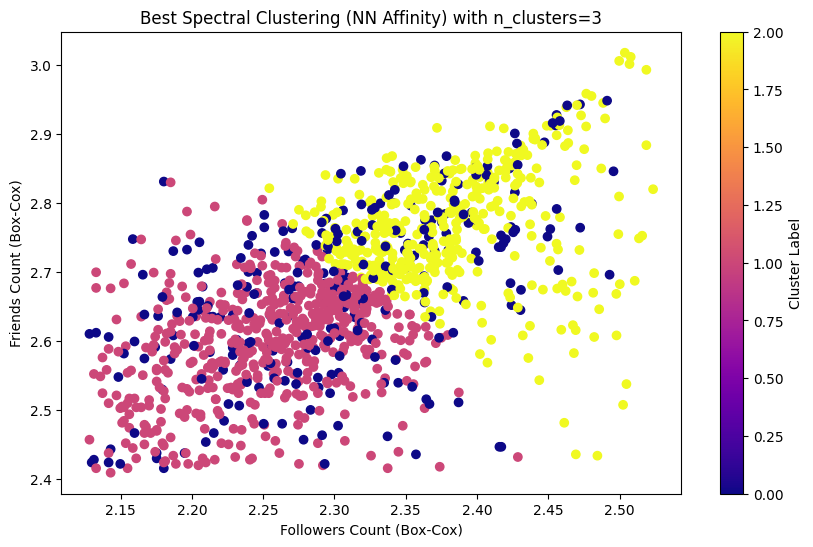

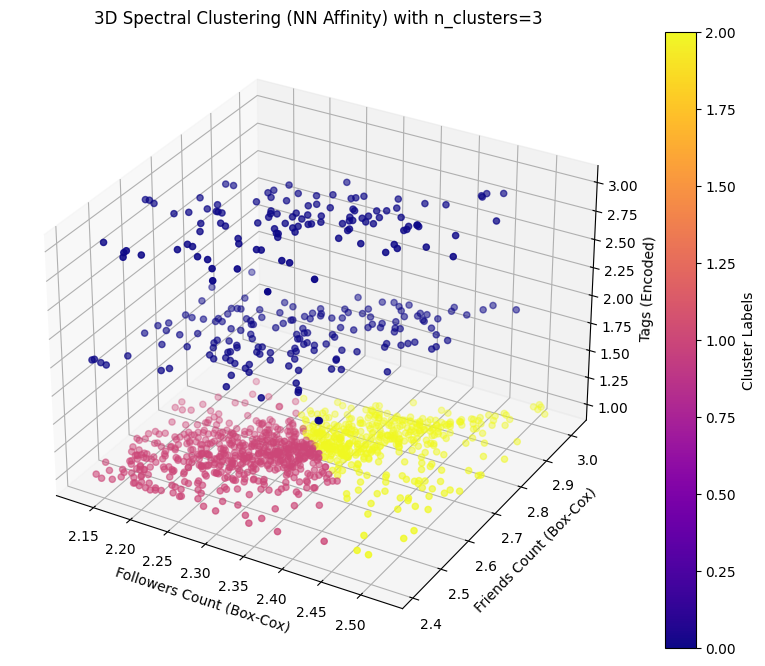

In [ ]:
# Visualization for the best Spectral Clustering model using Nearest Neighbors Affinity

# Assuming 'best_labels_nn' contains the cluster labels for the best model
df['Best_Spectral_NN_Labels'] = best_labels_nn

# 2D Scatter Plot using 'followersCount_boxcox' and 'friendsCount_boxcox'
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=best_labels_nn, cmap='plasma', marker='o')
plt.title(f'Best Spectral Clustering (NN Affinity) with n_clusters={best_n_clusters_nn}')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3D Scatter Plot using 'followersCount_boxcox', 'friendsCount_boxcox', and 'tags_numeric'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=best_labels_nn, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title(f'3D Spectral Clustering (NN Affinity) with n_clusters={best_n_clusters_nn}')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()


### 2.Visualization after Fine-Tuning RBF

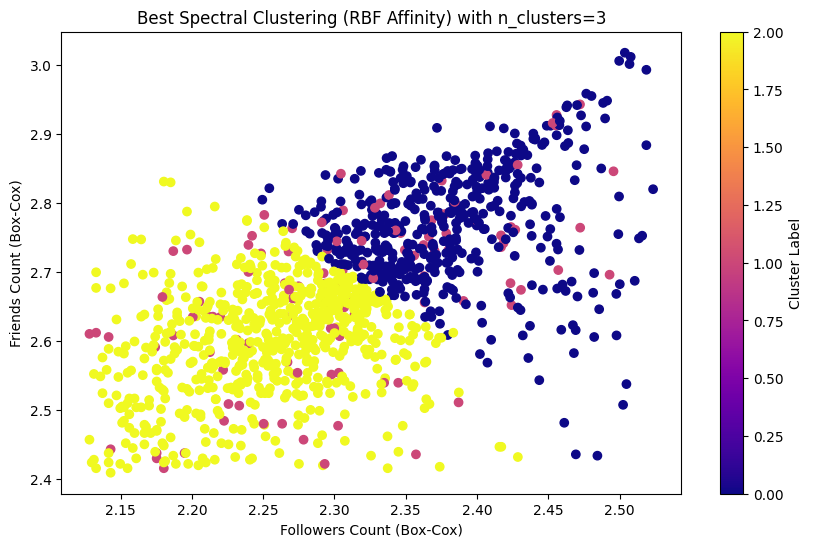

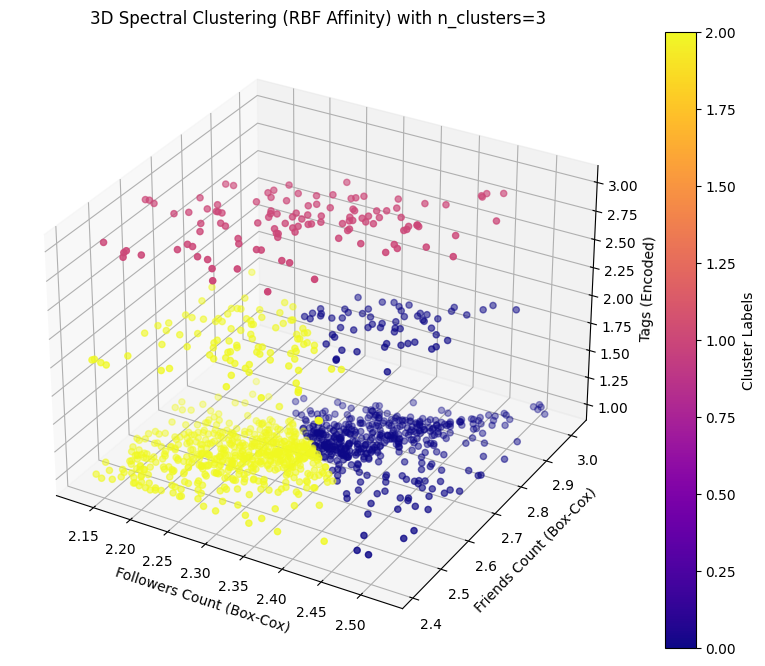

In [ ]:
# Visualization for the best Spectral Clustering model using RBF Affinity

# Assuming 'best_labels_rbf' contains the cluster labels for the best model
df['Best_Spectral_RBF_Labels'] = best_labels_rbf

# 2D Scatter Plot using 'followersCount_boxcox' and 'friendsCount_boxcox'
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=best_labels_rbf, cmap='plasma', marker='o')
plt.title(f'Best Spectral Clustering (RBF Affinity) with n_clusters={best_n_clusters_rbf}')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3D Scatter Plot using 'followersCount_boxcox', 'friendsCount_boxcox', and 'tags_numeric'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=best_labels_rbf, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title(f'3D Spectral Clustering (RBF Affinity) with n_clusters={best_n_clusters_rbf}')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()


## Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
#  Hierarchical Clustering using Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg_cluster.fit_predict(X_scaled)

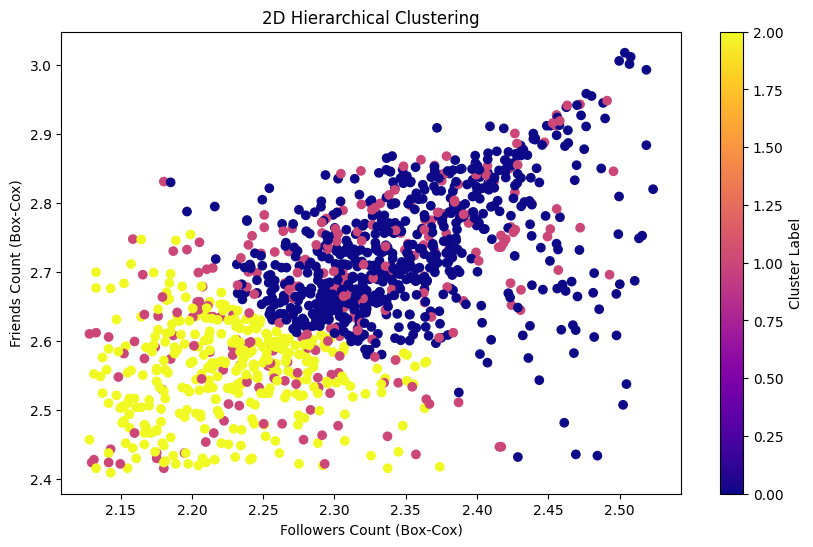

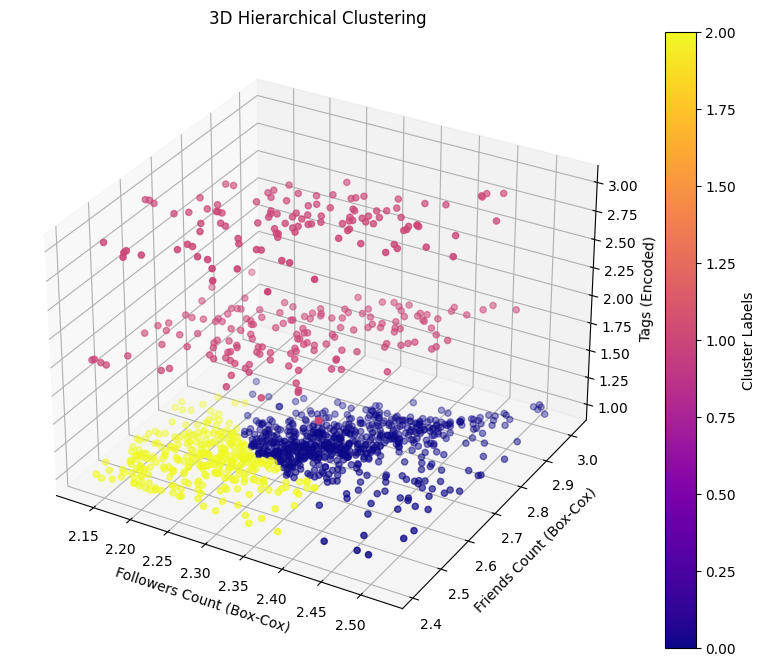

In [ ]:
# Visualize the distribution of labels in 2D
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=labels_agg, cmap='plasma', marker='o')
plt.title('2D Hierarchical Clustering')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3D Scatter Plot for Hierarchical Clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=labels_agg, cmap='plasma', marker='o')


ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title('3D Hierarchical Clustering')



plt.colorbar(sc, label='Cluster Labels')
plt.show()

In [ ]:
#  Evaluate the clustering performance
# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels_agg)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
db_score = davies_bouldin_score(X_scaled, labels_agg)
print(f"Davies-Bouldin Score: {db_score:.3f}")

# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X_scaled, labels_agg)
print(f"Calinski-Harabasz Score: {ch_score:.3f}")



Silhouette Score: 0.360
Davies-Bouldin Score: 0.984
Calinski-Harabasz Score: 719.863


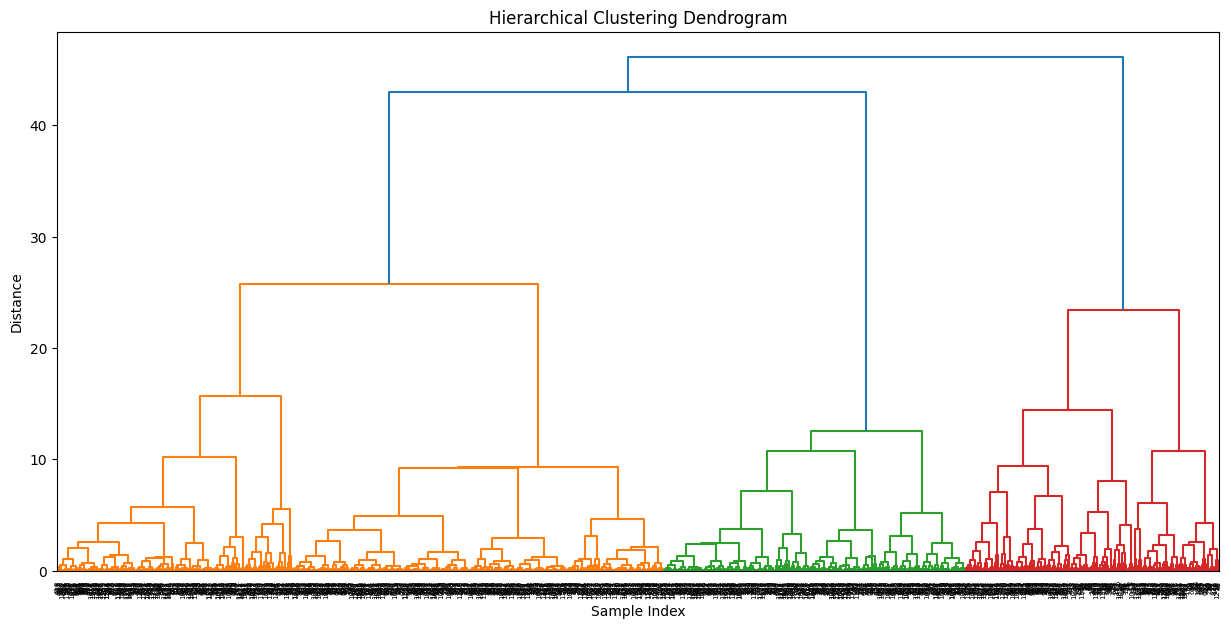

In [ ]:
#  Visualize the dendrogram
# Using the linkage function from scipy to compute the hierarchical clustering
linked = linkage(X_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### Fine-Tuning Hierarchical Clustering

In [ ]:
# Parameters for hierarchical clustering
n_clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
linkage_methods = ['ward', 'complete', 'average', 'single']

# Initialize variables to store the best model details
best_combined_score = -np.inf  # Start with the worst score
best_n_clusters = None
best_linkage_method = None
best_labels = None

# Iterate through all combinations of n_clusters and linkage methods
for n in n_clusters_list:
    for linkage in linkage_methods:
        # Apply Agglomerative Clustering with the current parameters
        agg_cluster = AgglomerativeClustering(n_clusters=n, linkage=linkage)
        labels = agg_cluster.fit_predict(X)

        # Only calculate metrics if there is more than one cluster
        if len(np.unique(labels)) > 1:
            # Compute performance metrics
            silhouette = silhouette_score(X, labels)
            davies_bouldin = davies_bouldin_score(X, labels)
            calinski_harabasz = calinski_harabasz_score(X, labels)

            print(f'n_clusters: {n}, Linkage: {linkage}, Silhouette Score: {silhouette}, '
                  f'Davies-Bouldin Index: {davies_bouldin}, Calinski-Harabasz Index: {calinski_harabasz}')

            # Combine the scores (weights can be adjusted as needed)
            combined_score = (silhouette + calinski_harabasz) - davies_bouldin  # Higher is better for Silhouette & CHI, lower for DBI

            # Update the best model based on the combined score
            if combined_score > best_combined_score:
                best_combined_score = combined_score
                best_davies_bouldin_score = davies_bouldin
                best_calinski_harabasz_score = calinski_harabasz
                best_silhouette_score = silhouette
                best_n_clusters = n
                best_linkage_method = linkage
                best_labels = labels

n_clusters: 2, Linkage: ward, Silhouette Score: 0.8083285651967164, Davies-Bouldin Index: 0.4443079797835043, Calinski-Harabasz Index: 5713.302506884277
n_clusters: 2, Linkage: complete, Silhouette Score: 0.8083285651967164, Davies-Bouldin Index: 0.4443079797835043, Calinski-Harabasz Index: 5713.302506884277
n_clusters: 2, Linkage: average, Silhouette Score: 0.7662782864416031, Davies-Bouldin Index: 0.22152306983897585, Calinski-Harabasz Index: 2769.147395608767
n_clusters: 2, Linkage: single, Silhouette Score: 0.7662782864416031, Davies-Bouldin Index: 0.22152306983897585, Calinski-Harabasz Index: 2769.147395608767
n_clusters: 3, Linkage: ward, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
n_clusters: 3, Linkage: complete, Silhouette Score: 0.8282840514257682, Davies-Bouldin Index: 0.2532040482230817, Calinski-Harabasz Index: 11740.531442653524
n_clusters: 3, Linkage: average, Silhouette Score: 0.828284051425

In [ ]:
# Print the best model's parameters and performance
print("\nBest Model:")
print(f'Number of Clusters: {best_n_clusters}, Linkage Method: {best_linkage_method}, Best Silhouette Score: {best_silhouette_score}')
print(f'Corresponding Davies-Bouldin Index: {best_davies_bouldin_score}')
print(f'Corresponding Calinski-Harabasz Index: {best_calinski_harabasz_score}')


Best Model:
Number of Clusters: 4, Linkage Method: complete, Best Silhouette Score: 0.5005813236867844
Corresponding Davies-Bouldin Index: 0.5150541411859451
Corresponding Calinski-Harabasz Index: 12603.214706738872


### Visualization after Fine-Tuning Hierarchical Clustering

Best Cluster counts: {0: 154, 1: 686, 2: 114, 3: 271}


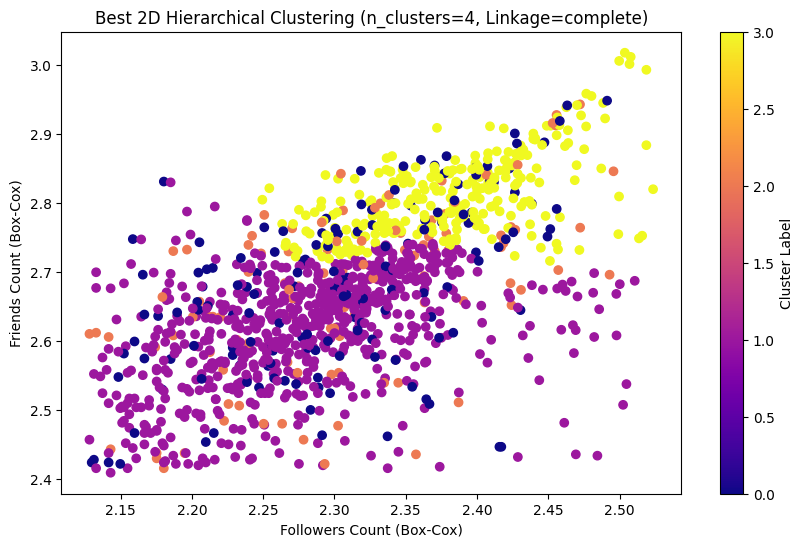

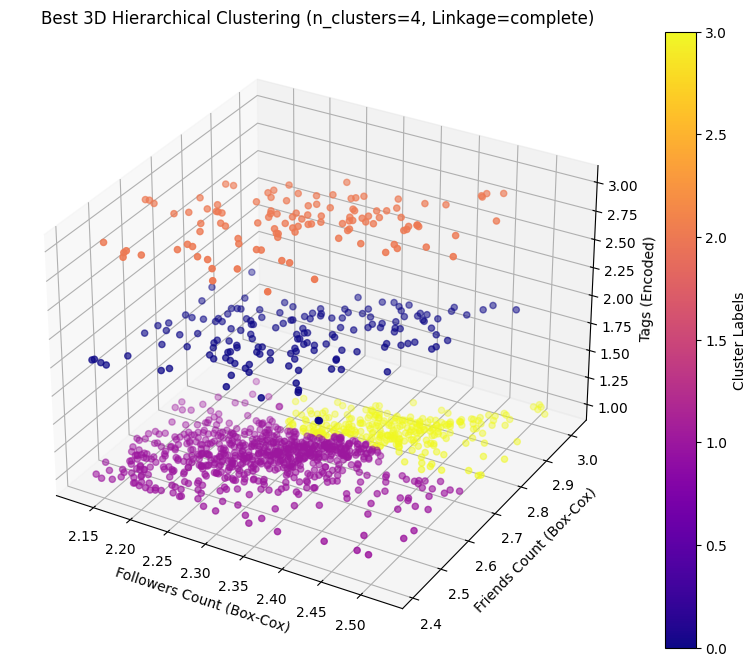

In [ ]:
# Assign the best labels to the DataFrame
df['Hierarchical_Best_Labels'] = best_labels

# Visualize the distribution of the best labels
unique_labels, counts = np.unique(best_labels, return_counts=True)
print("Best Cluster counts:", dict(zip(unique_labels, counts)))

# 2D Scatter Plot for the best hierarchical clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], c=best_labels, cmap='plasma', marker='o')
plt.title(f'Best 2D Hierarchical Clustering (n_clusters={best_n_clusters}, Linkage={best_linkage_method})')
plt.xlabel('Followers Count (Box-Cox)')
plt.ylabel('Friends Count (Box-Cox)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3D scatter plot for the best hierarchical clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three dimensions: 'followersCount_boxcox', 'friendsCount_boxcox', and 'tags_numeric'
sc = ax.scatter(df['followersCount_boxcox'], df['friendsCount_boxcox'], df['tags_numeric'], c=best_labels, cmap='plasma', marker='o')

# Add labels and title
ax.set_xlabel('Followers Count (Box-Cox)')
ax.set_ylabel('Friends Count (Box-Cox)')
ax.set_zlabel('Tags (Encoded)')
plt.title(f'Best 3D Hierarchical Clustering (n_clusters={best_n_clusters}, Linkage={best_linkage_method})')

# Add a color bar for cluster labels
plt.colorbar(sc, label='Cluster Labels')

# Show the 3D plot
plt.show()


# Conclusion

**DBSCAN**

Best Silhouette Score: 0.8441561812196503

Corresponding Davies-Bouldin Index: 0.23119292251193935

Corresponding Calinski-Harabasz Index: 14767.599674729607

**Mean Shift**

Best Silhouette Score: 0.8441561812196503

Corresponding Davies-Bouldin Index: 0.23119292251193932

Corresponding Calinski-Harabasz Index: 14767.599674729607

**GMM**

Best Silhouette Score: 0.8441561812196503

Corresponding Davies-Bouldin Index: 0.5198540576541686

Corresponding Calinski-Harabasz Index: 16969.119773904575

**Spectral NN**

Best Silhouette Score: 0.33360395120545144

Corresponding Davies-Bouldin Index: 1.2415314171091574

Corresponding Calinski-Harabasz Index: 641.556487622737

**Spectral RBF**

Best Silhouette Score: 0.3811130393211141

Corresponding Davies-Bouldin Index: 0.889032066346079

Corresponding Calinski-Harabasz Index: 767.4626675973062

**Hierarchical**

Best Silhouette Score: 0.5272148304607115

Corresponding Davies-Bouldin Index: 0.5274155507670295

Corresponding Calinski-Harabasz Index: 16545.570763168336


**GMM (Gaussian Mixture Model)** seems to be the best based on a balance of all three metrics:

High Silhouette Score (0.844)

Acceptable Davies-Bouldin Index (0.520)

Highest Calinski-Harabasz Index (16,969.1)

DBSCAN and Mean Shift also perform well, but GMM has the highest Calinski-Harabasz Index, which can indicate better separation and compactness of clusters in this case.